**Import libraries**

In [ ]:
import pandas as pd
import numpy as np 
import io
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import joblib
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error
from sklearn.metrics import roc_curve, mean_squared_error, homogeneity_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import RocCurveDisplay
from joblib import dump, load
from sklearn.manifold import TSNE


**Import dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
forensics = pd.read_csv(io.BytesIO(uploaded['VMResourceUtilizationSlope.csv']))



Saving VMResourceUtilizationSlope.csv to VMResourceUtilizationSlope (1).csv


**Exploratory data analysis**

In [ ]:
forensics.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,...,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,0.0,0.0,79.8981,5.5275,...,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0,0.0,0.0000,0.0000,...,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0,0.0,0.0000,0.0000,...,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0,0.0,0.0000,0.0000,...,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0,0.0,0.0000,0.0000,...,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [ ]:
forensics.shape

(9610, 44)

In [ ]:
forensics.columns

Index(['LAST_POLL', 'VMID', 'UUID', 'dom', 'rxbytes_slope', 'rxpackets_slope',
       'rxerrors_slope', 'rxdrops_slope', 'txbytes_slope', 'txpackets_slope',
       'txerrors_slope', 'txdrops_slope', 'timecpu_slope', 'timesys_slope',
       'timeusr_slope', 'state_slope', 'memmax_slope', 'mem_slope',
       'cpus_slope', 'cputime_slope', 'memactual_slope', 'memswap_in_slope',
       'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope',
       'memunused_slope', 'memavailable_slope', 'memusable_slope',
       'memlast_update_slope', 'memdisk_cache_slope',
       'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope',
       'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope',
       'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope',
       'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope',
       'hdaerror_slope', 'Status'],
      dtype='object')

In [ ]:
forensics['Status'].value_counts()

Normal    7288
Attack    2306
Name: Status, dtype: int64

In [ ]:
forensics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LAST_POLL                 9610 non-null   int64  
 1   VMID                      9610 non-null   int64  
 2   UUID                      9610 non-null   object 
 3   dom                       9610 non-null   object 
 4   rxbytes_slope             9594 non-null   float64
 5   rxpackets_slope           9594 non-null   float64
 6   rxerrors_slope            9594 non-null   float64
 7   rxdrops_slope             9594 non-null   float64
 8   txbytes_slope             9594 non-null   float64
 9   txpackets_slope           9594 non-null   float64
 10  txerrors_slope            9594 non-null   float64
 11  txdrops_slope             9594 non-null   float64
 12  timecpu_slope             9594 non-null   float64
 13  timesys_slope             9594 non-null   float64
 14  timeusr_

In [ ]:
forensics.isnull().sum()

LAST_POLL                    0
VMID                         0
UUID                         0
dom                          0
rxbytes_slope               16
rxpackets_slope             16
rxerrors_slope              16
rxdrops_slope               16
txbytes_slope               16
txpackets_slope             16
txerrors_slope              16
txdrops_slope               16
timecpu_slope               16
timesys_slope               16
timeusr_slope               16
state_slope                 16
memmax_slope                16
mem_slope                   16
cpus_slope                  16
cputime_slope               16
memactual_slope             16
memswap_in_slope            16
memswap_out_slope           16
memmajor_fault_slope        16
memminor_fault_slope        16
memunused_slope             16
memavailable_slope          16
memusable_slope             16
memlast_update_slope        16
memdisk_cache_slope         16
memhugetlb_pgalloc_slope    16
memhugetlb_pgfail_slope     16
memrss_s

In [ ]:
forensics = forensics.dropna()

In [ ]:
forensics.isnull().sum()

LAST_POLL                   0
VMID                        0
UUID                        0
dom                         0
rxbytes_slope               0
rxpackets_slope             0
rxerrors_slope              0
rxdrops_slope               0
txbytes_slope               0
txpackets_slope             0
txerrors_slope              0
txdrops_slope               0
timecpu_slope               0
timesys_slope               0
timeusr_slope               0
state_slope                 0
memmax_slope                0
mem_slope                   0
cpus_slope                  0
cputime_slope               0
memactual_slope             0
memswap_in_slope            0
memswap_out_slope           0
memmajor_fault_slope        0
memminor_fault_slope        0
memunused_slope             0
memavailable_slope          0
memusable_slope             0
memlast_update_slope        0
memdisk_cache_slope         0
memhugetlb_pgalloc_slope    0
memhugetlb_pgfail_slope     0
memrss_slope                0
vdard_req_

In [ ]:
# find categorical variables

categorical = [var for var in forensics.columns if forensics[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 3 categorical variables

The categorical variables are : ['UUID', 'dom', 'Status']


In [ ]:
forensics.describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [ ]:
# view the categorical variables

forensics[categorical].head()

,UUID,dom,Status
0,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
1,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
2,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
3,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal
4,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,Normal


In [ ]:
# find numerical variables

numerical = [var for var in forensics.columns if forensics[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 41 numerical variables

The numerical variables are : ['LAST_POLL', 'VMID', 'rxbytes_slope', 'rxpackets_slope', 'rxerrors_slope', 'rxdrops_slope', 'txbytes_slope', 'txpackets_slope', 'txerrors_slope', 'txdrops_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope', 'memmax_slope', 'mem_slope', 'cpus_slope', 'cputime_slope', 'memactual_slope', 'memswap_in_slope', 'memswap_out_slope', 'memmajor_fault_slope', 'memminor_fault_slope', 'memunused_slope', 'memavailable_slope', 'memusable_slope', 'memlast_update_slope', 'memdisk_cache_slope', 'memhugetlb_pgalloc_slope', 'memhugetlb_pgfail_slope', 'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope', 'vdawr_bytes_slope', 'vdaerror_slope', 'hdard_req_slope', 'hdard_bytes_slope', 'hdawr_reqs_slope', 'hdawr_bytes_slope', 'hdaerror_slope']


In [ ]:
# view summary statistics in numerical variables

forensics[numerical].describe()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
count,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.0,9594.0,9594.000000,9594.000000,9594.0,9594.0,...,9594.000000,9594.000000,9594.000000,9594.000000,9594.0,9594.000000,9594.000000,9594.0,9594.0,9594.0
mean,1.604482e+09,7.551178,88.237795,35.454518,0.0,0.0,31.755948,22.272845,0.0,0.0,...,0.869522,2.360632,31.607359,80.303610,0.0,0.024526,0.056261,0.0,0.0,0.0
std,8.162846e+04,1.731400,0.779002,18.590801,0.0,0.0,41.176777,36.895174,0.0,0.0,...,7.763400,14.373804,27.642737,27.866019,0.0,1.105076,2.249146,0.0,0.0,0.0
min,1.604406e+09,1.000000,58.392500,1.789900,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
25%,1.604424e+09,6.000000,87.797400,26.565100,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,11.309900,89.963100,0.0,0.000000,0.000000,0.0,0.0,0.0
50%,1.604442e+09,8.000000,87.954600,28.072500,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,18.434900,89.983900,0.0,0.000000,0.000000,0.0,0.0,0.0
75%,1.604589e+09,9.000000,88.264300,30.963800,0.0,0.0,81.275200,23.782000,0.0,0.0,...,0.000000,0.000000,62.650100,89.995100,0.0,0.000000,0.000000,0.0,0.0,0.0
max,1.604636e+09,10.000000,89.999900,89.915700,0.0,0.0,90.000000,89.998200,0.0,0.0,...,89.593000,90.000000,89.083800,90.000000,0.0,64.840700,89.992100,0.0,0.0,0.0


In [ ]:
forensics[numerical].head()

,LAST_POLL,VMID,rxbytes_slope,rxpackets_slope,rxerrors_slope,rxdrops_slope,txbytes_slope,txpackets_slope,txerrors_slope,txdrops_slope,...,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,vdaerror_slope,hdard_req_slope,hdard_bytes_slope,hdawr_reqs_slope,hdawr_bytes_slope,hdaerror_slope
0,1604455173,7,88.2065,30.1414,0.0,0.0,79.8981,5.5275,0.0,0.0,...,0.0,0.0,24.3045,89.9850,0.0,0.0,0.0,0.0,0.0,0.0
1,1604455142,7,87.8708,27.3499,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,5.9061,89.8986,0.0,0.0,0.0,0.0,0.0,0.0
2,1604455113,7,87.8865,27.2996,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,32.8285,89.9897,0.0,0.0,0.0,0.0,0.0,0.0
3,1604455082,7,87.8760,27.4076,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,4.2364,89.8741,0.0,0.0,0.0,0.0,0.0,0.0
4,1604455055,7,87.7241,25.8210,0.0,0.0,0.0000,0.0000,0.0,0.0,...,0.0,0.0,22.7510,89.9864,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove features which has only 0

forensics = forensics.loc[:, (forensics != 0).any(axis=0)]

In [ ]:
forensics.shape

(9594, 25)

In [ ]:
# find numerical variables

numerical = [var for var in forensics.columns if forensics[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 22 numerical variables

The numerical variables are : ['LAST_POLL', 'VMID', 'rxbytes_slope', 'rxpackets_slope', 'txbytes_slope', 'txpackets_slope', 'timecpu_slope', 'timesys_slope', 'timeusr_slope', 'state_slope', 'cputime_slope', 'memminor_fault_slope', 'memunused_slope', 'memusable_slope', 'memlast_update_slope', 'memrss_slope', 'vdard_req_slope', 'vdard_bytes_slope', 'vdawr_reqs_slope', 'vdawr_bytes_slope', 'hdard_req_slope', 'hdard_bytes_slope']


In [ ]:
forensics['Status']=forensics['Status'].replace(['Normal','Attack'],[0,1])

In [ ]:
forensics.head()

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,79.8981,5.5275,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,24.3045,89.9850,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0000,0.0000,73.8278,0.0,...,0.0,0.0,0.0,0.0,0.0,5.9061,89.8986,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,32.8285,89.9897,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.2364,89.8741,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0000,0.0000,0.0000,0.0,...,0.0,0.0,0.0,0.0,0.0,22.7510,89.9864,0.0,0.0,0


In [ ]:
forensics['Status'].value_counts()

0    7288
1    2306
Name: Status, dtype: int64

In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=forensics.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df = forensics.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

In [ ]:
df.shape

(9594, 21)

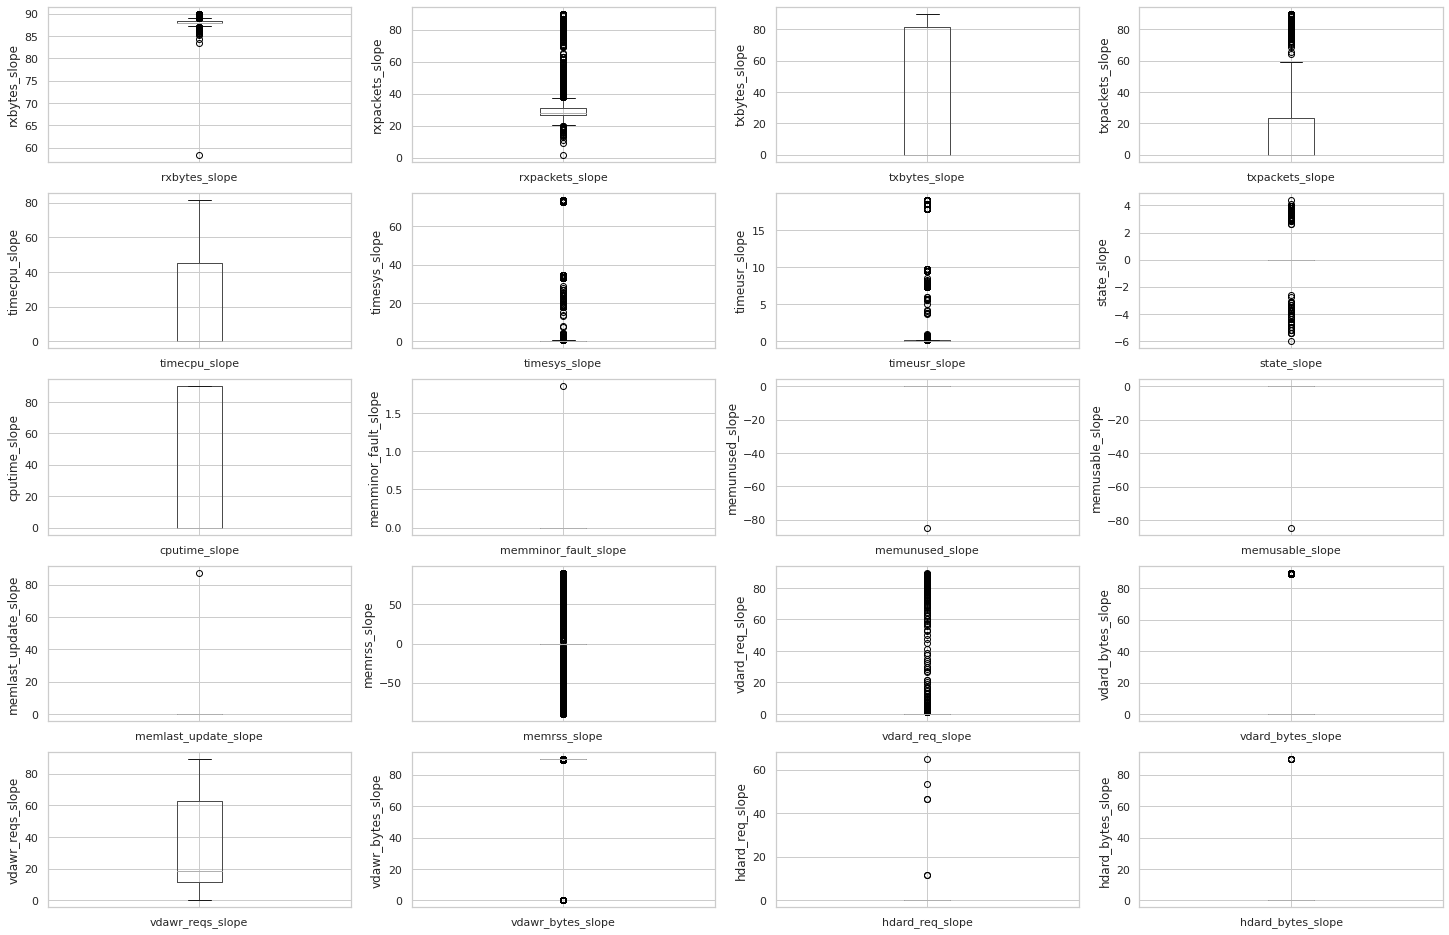

In [ ]:
# draw boxplots to visualize outliers

plt.figure(figsize=(25,20))

for i, column in enumerate(df.columns[:-1]):
    plt.subplot(6, 4, i+1)
    fig = df.boxplot(column=column)
    fig.set_title('')
    fig.set_ylabel(column)

In [ ]:
df.corr()

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
rxbytes_slope,1.000000,0.891586,0.578981,0.583399,-0.144068,-0.025594,-0.032068,-0.100520,-0.177710,0.011323,...,-0.011323,0.011323,-0.014565,0.070868,0.069281,-0.084335,-0.207916,0.005258,-0.000407,0.578740
rxpackets_slope,0.891586,1.000000,0.576056,0.643415,-0.187989,-0.069083,-0.066667,-0.028012,-0.221175,0.008823,...,-0.008823,0.008823,-0.019181,0.063265,0.056020,-0.132336,-0.252219,0.004506,-0.000433,0.648451
txbytes_slope,0.578981,0.576056,1.000000,0.718074,-0.090669,0.321457,0.237248,-0.002109,-0.150246,-0.007874,...,0.007874,-0.007874,0.018934,0.049779,0.042840,-0.142722,-0.341960,-0.017118,-0.019293,0.669029
txpackets_slope,0.583399,0.643415,0.718074,1.000000,-0.129637,0.494008,0.445218,0.005109,-0.216039,-0.006164,...,0.006164,-0.006164,-0.041107,0.017229,0.000598,-0.280390,-0.543437,-0.013400,-0.015102,0.982704
timecpu_slope,-0.144068,-0.187989,-0.090669,-0.129637,1.000000,0.007230,-0.015355,0.009922,0.918906,0.002315,...,-0.002315,0.002315,0.095984,0.034039,0.049312,0.227789,0.099803,0.004550,0.010084,-0.152591
timesys_slope,-0.025594,-0.069083,0.321457,0.494008,0.007230,1.000000,0.449942,0.012838,-0.049789,0.007237,...,-0.007237,0.007237,-0.034656,-0.020229,-0.034306,-0.163256,-0.321277,0.000534,-0.000919,0.478070
timeusr_slope,-0.032068,-0.066667,0.237248,0.445218,-0.015355,0.449942,1.000000,-0.001899,-0.062241,0.008352,...,-0.008352,0.008352,-0.034384,-0.017467,-0.031948,-0.149872,-0.285678,0.001418,-0.001033,0.430680
state_slope,-0.100520,-0.028012,-0.002109,0.005109,0.009922,0.012838,-0.001899,1.000000,0.008612,0.000074,...,-0.000074,0.000074,0.073055,-0.017238,-0.011518,-0.022075,0.003240,0.000161,0.000181,0.004155
cputime_slope,-0.177710,-0.221175,-0.150246,-0.216039,0.918906,-0.049789,-0.062241,0.008612,1.000000,0.012377,...,-0.012377,0.012377,0.150358,0.046221,0.071596,0.420300,0.152159,0.026906,0.030325,-0.241402
memminor_fault_slope,0.011323,0.008823,-0.007874,-0.006164,0.002315,0.007237,0.008352,0.000074,0.012377,1.000000,...,-1.000000,1.000000,0.029471,0.116690,0.062255,0.000451,0.003550,0.598875,0.408282,-0.005743


Text(0.5, 1.0, 'Feature Correlation Heatmap')

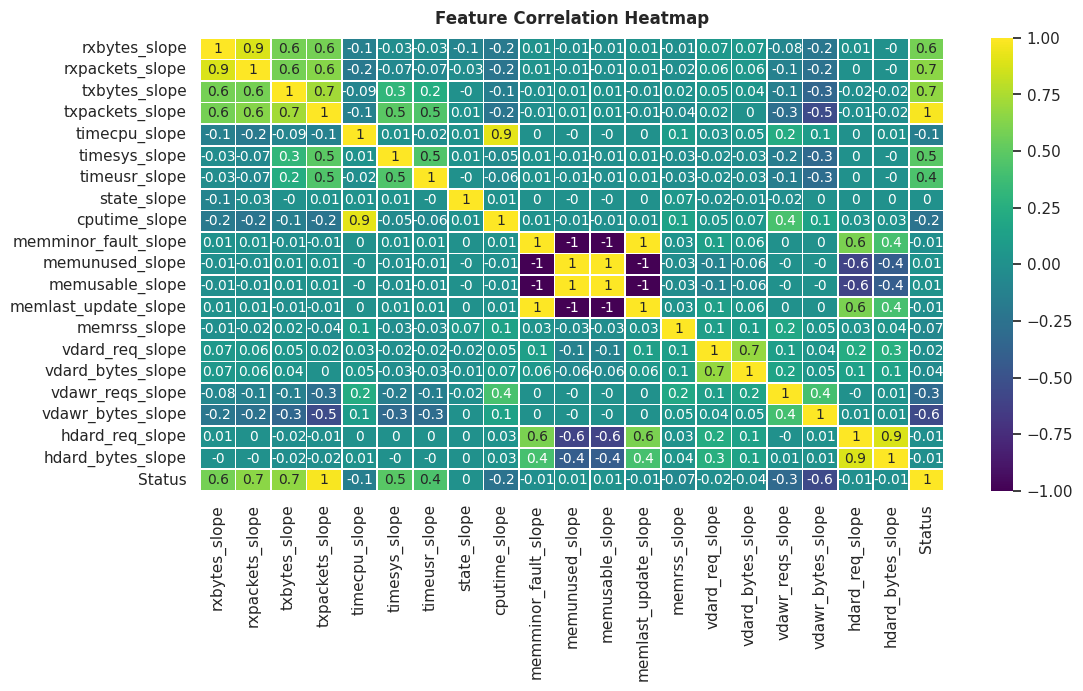

In [ ]:
plt.figure(figsize=(12,6), dpi =100)
sns.heatmap(round(df.corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

**Define features & Target**

In [ ]:
X = df.drop(['Status'], axis=1)

In [ ]:
y = df['Status']


**Feature Scaling for Clustering**

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

**Split Data to Train Test**

In [ ]:
#train test split
X_train1, X_test1,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)

**Scaling Train and test Features for Classification Modeling**

In [ ]:
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)
X_train = pd.DataFrame(data=X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(data=X_test, columns=df.columns[:-1])

In [ ]:
X_train

,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,timeusr_slope,state_slope,cputime_slope,memminor_fault_slope,memunused_slope,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope
0,-0.642474,-0.518648,-0.774071,-0.606132,-0.758062,-0.301377,-0.247796,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.586839,0.355837,-0.023581,-0.027298
1,-0.279497,-0.357642,-0.774071,-0.606132,-0.758062,-0.294466,-0.248847,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,2.579416,-0.116919,-0.167849,1.073956,0.356930,-0.023581,-0.027298
2,-0.544365,-0.475514,-0.774071,-0.606132,0.208241,-0.282315,-0.227750,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,-0.424217,-0.116919,-0.167849,0.408925,0.356807,-0.023581,-0.027298
3,-0.544365,-0.475514,-0.774071,-0.606132,1.765076,-0.301377,-0.248335,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,-0.194088,-0.116919,-0.167849,-0.356712,0.356266,-0.023581,-0.027298
4,-0.348148,-0.393811,-0.774071,-0.606132,-0.758062,-0.301377,-0.238042,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-1.074315,0.342380,-0.023581,-0.027298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6710,2.008710,1.876273,-0.774071,-0.606132,0.499325,-0.290786,-0.240898,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.839188,0.356185,-0.023581,-0.027298
6711,2.166483,2.682840,1.407888,1.678077,-0.758062,-0.301377,-0.243862,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-1.143189,-2.807534,-0.023581,-0.027298
6712,-0.335166,-0.388060,-0.774071,-0.606132,-0.758062,-0.288615,-0.230687,-0.001314,-0.823863,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,-0.777944,0.355165,-0.023581,-0.027298
6713,-0.544365,-0.475514,-0.774071,-0.606132,0.401608,-0.296612,-0.238042,-0.001314,1.213794,-0.012204,0.012204,0.012204,-0.012204,0.044127,-0.116919,-0.167849,0.986519,0.356913,-0.023581,-0.027298


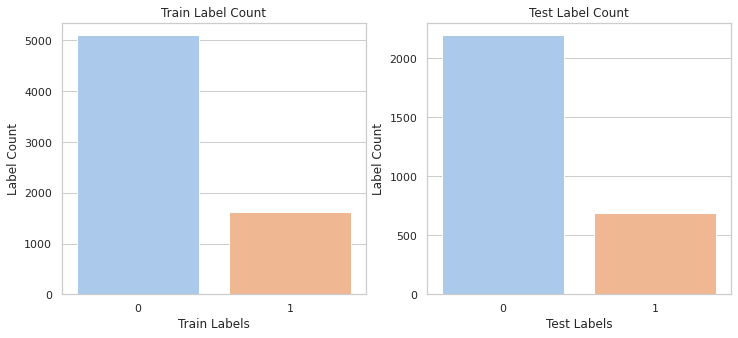

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train), ('Test', y_test)]):
    data = group[1].value_counts()
    sns.set_theme(style="whitegrid")
    sns.barplot(ax=ax[idx], x=data.index, y=data.values,palette="pastel")
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

**Random Oversampling**

In [ ]:
count_class_0,count_class_1=forensics.Status.value_counts()
df_class_0=forensics[forensics['Status']==0]
df_class_1=forensics[forensics['Status']==1]
df_class_0

,LAST_POLL,VMID,UUID,dom,rxbytes_slope,rxpackets_slope,txbytes_slope,txpackets_slope,timecpu_slope,timesys_slope,...,memusable_slope,memlast_update_slope,memrss_slope,vdard_req_slope,vdard_bytes_slope,vdawr_reqs_slope,vdawr_bytes_slope,hdard_req_slope,hdard_bytes_slope,Status
0,1604455173,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,88.2065,30.1414,79.8981,5.5275,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,24.3045,89.9850,0.0,0.0,0
1,1604455142,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8708,27.3499,0.0000,0.0000,73.8278,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,5.9061,89.8986,0.0,0.0,0
2,1604455113,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8865,27.2996,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,32.8285,89.9897,0.0,0.0,0
3,1604455082,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.8760,27.4076,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,4.2364,89.8741,0.0,0.0,0
4,1604455055,7,"""2bc1fde1-28d9-454e-8029-21a138714234""",one-33,87.7241,25.8210,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0000,0.0000,22.7510,89.9864,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,1604486612,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,88.3681,29.5388,0.0000,0.0000,44.0290,0.1146,...,0.0,0.0,89.1608,0.0000,0.0000,29.5388,89.9880,0.0,0.0,0
7297,1604486582,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,87.7974,26.5651,0.0000,0.0000,44.0290,0.0573,...,0.0,0.0,0.0000,0.0000,0.0000,21.8014,89.9767,0.0,0.0,0
7298,1604486552,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,87.7974,26.5651,0.0000,0.0000,41.9872,0.5920,...,0.0,0.0,89.7913,0.0000,0.0000,20.1363,89.9865,0.0,0.0,0
7299,1604486522,3,"""fca7204b-7141-4055-82b7-b793b4694d70""",one-33,88.0546,29.2488,0.0000,0.0000,45.0000,0.1146,...,0.0,0.0,0.0000,0.0000,0.0000,21.8014,89.9781,0.0,0.0,0


In [ ]:
df_class_1_over=df_class_1.sample(count_class_0, replace=True)
df_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [ ]:
print("Random Over Sampling: ")
print(df_over.Status.value_counts())

Random Over Sampling: 
0    7288
1    7288
Name: Status, dtype: int64


In [ ]:
colors =['#069AF3','#FF4500','#3f88c5','#ffba08','#d00000']
fig = go.Figure(go.Pie(labels=['Normal','Attack'],values=df_over.Status.value_counts(),name='Attack'))
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16,marker={'colors':colors})
fig.update_layout(height=400, width=400, title_text='<b style="color:#000000;">Percentage of Target Variable</b>')
fig.show()

In [ ]:
df_over=df_over.drop(['LAST_POLL', 'VMID', 'UUID','dom'], axis=1)

Text(0.5, 1.0, 'Feature Correlation Heatmap')

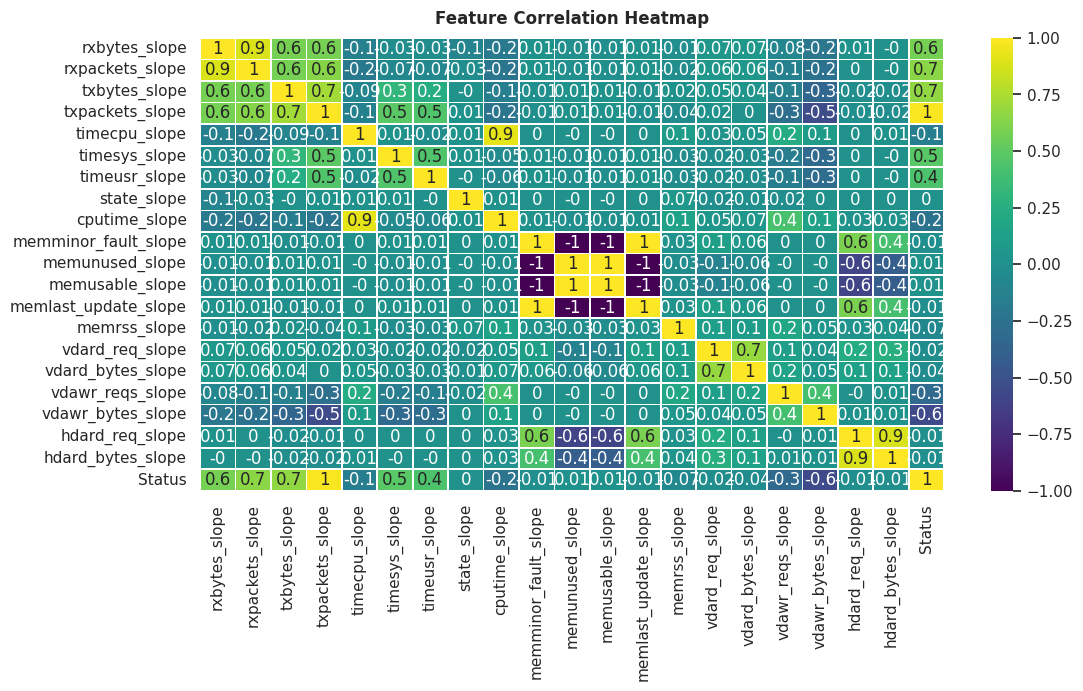

In [ ]:
plt.figure(figsize=(12,6), dpi = 100)
sns.heatmap(round(df.corr(), 2), linewidth=0.5,annot=True,fmt='.1g', cmap="viridis")
plt.title("Feature Correlation Heatmap", fontsize = 12, pad =10, fontweight='bold')

**Splitting Oversampled Data into Test and Train**

In [ ]:

X_oversampled = df_over.drop(['Status'], axis=1)


In [ ]:
y_oversampled = df_over['Status']


In [ ]:
#train test split
X_train_over1, X_test_over1,y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
X_train_over = scaler.fit_transform(X_train_over1)
X_test_over = scaler.transform(X_test_over1)
X_train_over = pd.DataFrame(data=X_train_over, columns=df.columns[:-1])
X_test_over = pd.DataFrame(data=X_test_over, columns=df.columns[:-1])

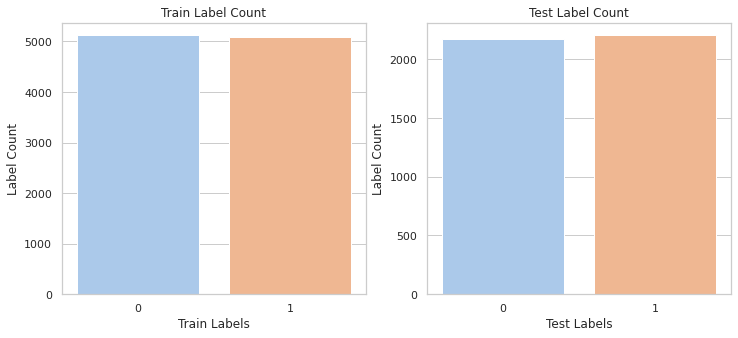

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,2, figsize=(12,5))
for idx, group in enumerate([('Train', y_train_over), ('Test', y_test_over)]):
    data = group[1].value_counts()
    sns.set_theme(style="whitegrid")
    sns.barplot(ax=ax[idx], x=data.index, y=data.values,palette="pastel")
    ax[idx].set_title(f'{group[0]} Label Count')
    ax[idx].set_xlabel(f'{group[0]} Labels')
    ax[idx].set_ylabel('Label Count')

plt.show()

In [ ]:
# K-means for EDA 

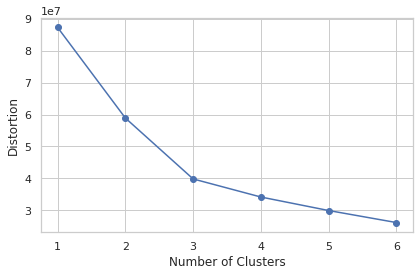

In [ ]:
# Elbow method to find the optimal value of K
distortions = []
for i in range(1,7):
    km = KMeans(n_clusters=i,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=0)
    km.fit_predict(X)
    distortions.append(km.inertia_)
plt.plot(range(1,7), distortions, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=2,
           init='k-means++',
           n_init=10,
           max_iter=300,
           random_state=1)
y_km = km.fit_predict(scaled_X)

In [ ]:
y_km

array([1, 1, 1, ..., 0, 0, 1], dtype=int32)

In [ ]:
homogeneity_score(y, y_km)

0.8661393463406997

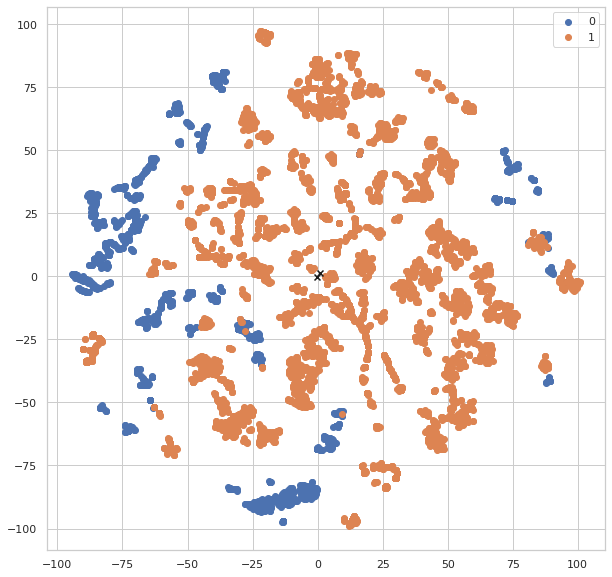

In [ ]:
kmeans = km.fit(scaled_X)
centers = np.array(kmeans.cluster_centers_)
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random').fit_transform(scaled_X)
label = km.fit_predict(scaled_X)

plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
    plt.scatter(X_embedded[label == i , 0] , X_embedded[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()


**Support Vector Machine before balancing**

In [ ]:
#Support Vector Machine before balancing
svc = SVC(class_weight='balanced')

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 10, 100, 1000],'gamma':['scale','auto'], 'kernel': ['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
svm = SVC(C=100, gamma= 'scale', kernel = 'linear')

In [ ]:
svm.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [ ]:
dump(svm, 'svm.joblib')
loaded_svm = load('svm.joblib')

In [ ]:
y_pred_svm = loaded_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svm, digits = 4))

              precision    recall  f1-score   support

           0     0.9986    0.9986    0.9986      2191
           1     0.9956    0.9956    0.9956       688

    accuracy                         0.9979      2879
   macro avg     0.9971    0.9971    0.9971      2879
weighted avg     0.9979    0.9979    0.9979      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



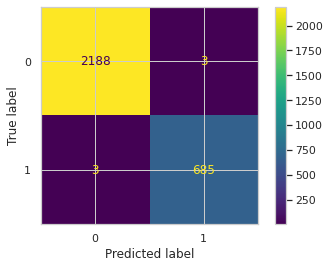

In [ ]:
plot_confusion_matrix(loaded_svm,X_test,y_test)

In [ ]:
!pip install scikit-plot


In [ ]:
import scikitplot as skplt

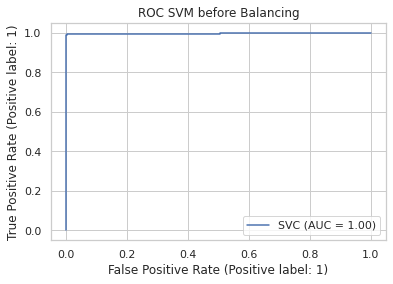

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(loaded_svm, X_test, y_test)
plt.title('ROC SVM before Balancing')
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_svm))
print('Precision : %3f' % precision_score(y_test, y_pred_svm))
print('Recall : %3f' % recall_score(y_test, y_pred_svm))
print('F1 : %3f' % f1_score(y_test, y_pred_svm))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_svm))

Accuracy : 0.997916
Precision : 0.995640
Recall : 0.995640
F1 : 0.995640
kappa_statistic : 0.994270


# Support Vector Machine After Balancing

In [ ]:
svc_over= SVC()

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 10,100,1000],'gamma':['scale','auto'], 'kernel': ['linear','rbf']}
grid = GridSearchCV(svc_over,param_grid)

In [ ]:
grid.fit(X_train_over,y_train_over)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm_over = SVC(C=1000, gamma = 'scale', kernel='rbf')

In [ ]:
svm_over.fit(X_train_over,y_train_over)

SVC(C=1000)

In [ ]:
dump(svm_over, 'svm_over.joblib')
loaded_svm_over = load('svm_over.joblib')

In [ ]:
y_pred_svm_over = loaded_svm_over.predict(X_test_over)

In [ ]:
print(classification_report(y_test_over,y_pred_svm_over, digits =4))

              precision    recall  f1-score   support

           0     0.9959    0.9982    0.9970      2172
           1     0.9982    0.9959    0.9970      2201

    accuracy                         0.9970      4373
   macro avg     0.9970    0.9970    0.9970      4373
weighted avg     0.9970    0.9970    0.9970      4373



In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_svm_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_svm_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_svm_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_svm_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_svm_over))

Accuracy : 0.997027
Precision : 0.998179
Recall : 0.995911
F1 : 0.997043
kappa_statistic : 0.994054


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Text(0.5, 1.0, 'SVM Over Sampled')

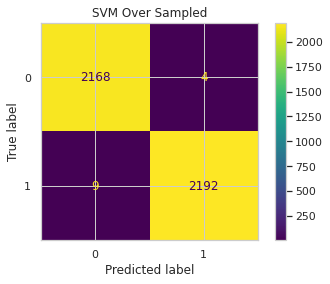

In [ ]:
plot_confusion_matrix(loaded_svm_over, X_test_over,y_test_over)
plt.title('SVM Over Sampled')

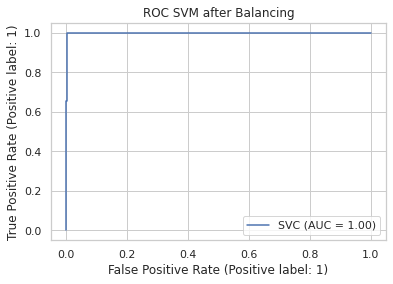

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(loaded_svm_over, X_test_over, y_test_over)
plt.title('ROC SVM after Balancing')
plt.show()

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Maximum number of levels in tree
max_depth = [2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(param_grid)

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)

In [ ]:
rf_Grid.fit(X_train_over,y_train_over)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391,
                                          445, 500]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 10}

In [ ]:
forest = RandomForestClassifier(max_depth=5, min_samples_leaf= 2, n_estimators= 10, random_state=1)

forest.fit(X_train,y_train)
importances = forest.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

,feature,importances
0,txpackets_slope,0.397149
1,txbytes_slope,0.234785
2,vdawr_reqs_slope,0.131856
3,vdawr_bytes_slope,0.075706
4,rxpackets_slope,0.072385
5,rxbytes_slope,0.049761
6,timeusr_slope,0.028061
7,memrss_slope,0.003836
8,timesys_slope,0.003012
9,cputime_slope,0.001957


In [ ]:
#Selected Features
X_sf= df_over[['txpackets_slope', 'txbytes_slope', 'rxbytes_slope', 'rxpackets_slope', 'vdawr_reqs_slope',
           'vdawr_bytes_slope','timesys_slope', 'timeusr_slope',  'timecpu_slope', 
          'cputime_slope', 'memrss_slope']]

In [ ]:
X_train2, X_test2,y_train_sf, y_test_sf = train_test_split(X_sf, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
X_train_sf = scaler.fit_transform(X_train2)
X_test_sf = scaler.transform(X_test2)

# SVM with Selected Features

In [ ]:
svc = SVC()

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1, 10, 100, 1000],'gamma':['scale','auto'],
             'kernel': ['linear','rbf']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
grid.fit(X_train_sf,y_train_sf)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
svm_sf = SVC(C=100, gamma= 'scale', kernel = 'rbf')

In [ ]:
svm_sf.fit(X_train_sf, y_train_sf)

SVC(C=100)

In [ ]:
dump(svm_sf, 'svm_sf.joblib')
loaded_svm_sf = load('svm_sf.joblib')

In [ ]:
y_pred_svm_sf = loaded_svm_sf.predict(X_test_sf)

In [ ]:
print(classification_report(y_test_sf, y_pred_svm_sf, digits =4))

              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995      2172
           1     0.9995    0.9995    0.9995      2201

    accuracy                         0.9995      4373
   macro avg     0.9995    0.9995    0.9995      4373
weighted avg     0.9995    0.9995    0.9995      4373



In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_sf, y_pred_svm_sf))
print('Precision : %3f' % precision_score(y_test_sf, y_pred_svm_sf))
print('Recall : %3f' % recall_score(y_test_sf, y_pred_svm_sf))
print('F1 : %3f' % f1_score(y_test_sf, y_pred_svm_sf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_sf, y_pred_svm_sf))

Accuracy : 0.999543
Precision : 0.999546
Recall : 0.999546
F1 : 0.999546
kappa_statistic : 0.999085


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



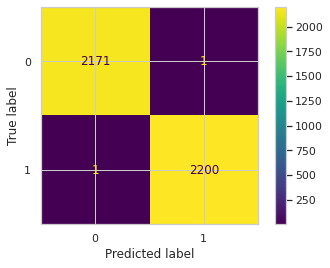

In [ ]:
plot_confusion_matrix(loaded_svm_sf,X_test_sf,y_test_sf)

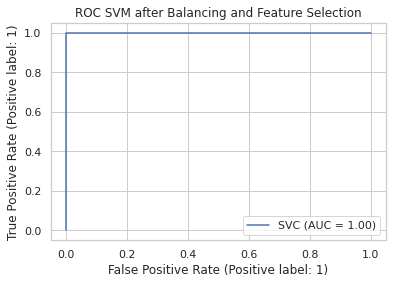

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(loaded_svm_sf, X_test_sf, y_test_sf)
plt.title('ROC SVM after Balancing and Feature Selection')
plt.show()

![](https://drive.google.com/uc?export=view&id=1JGR7X0c86dUWBTvQ3y-K1XifGF0r7sIG)

# Naive Bayes before Balancing

In [ ]:
#Naive Bayes without Balancing
bnb=BernoulliNB(class_prior=[0.76,0.24], alpha=1 )
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1, class_prior=[0.76, 0.24])

In [ ]:
dump(bnb, 'bnb.joblib')
loaded_nb_model = load('bnb.joblib')

In [ ]:
y_pred_nb = loaded_nb_model.predict(X_test)

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred_nb))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2191
           1       0.91      0.96      0.93       688

    accuracy                           0.97      2879
   macro avg       0.95      0.97      0.96      2879
weighted avg       0.97      0.97      0.97      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



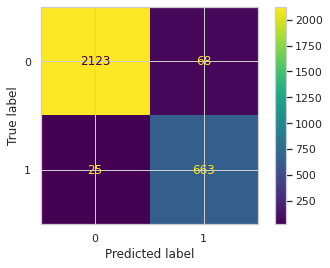

In [ ]:
plot_confusion_matrix(loaded_nb_model,X_test,y_test)
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_nb))
print('Precision : %3f' % precision_score(y_test, y_pred_nb))
print('Recall : %3f' % recall_score(y_test, y_pred_nb))
print('F1 : %3f' % f1_score(y_test, y_pred_nb))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_nb))

Accuracy : 0.967697
Precision : 0.906977
Recall : 0.963663
F1 : 0.934461
kappa_statistic : 0.913053


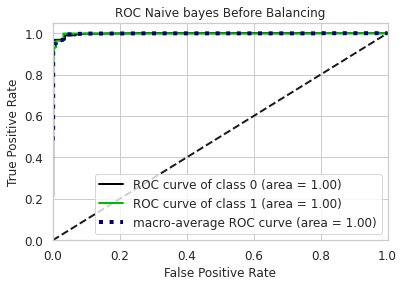

In [ ]:
skplt.metrics.plot_roc(y_test, loaded_nb_model.predict_proba(X_test), plot_micro=False)
plt.title('ROC Naive bayes Before Balancing')
plt.show()

# Naive Bayes after Balancing

In [ ]:
bnb_over=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb_over.fit(X_train_over, y_train_over)

BernoulliNB(alpha=1, class_prior=[0.5, 0.5])

In [ ]:
dump(bnb_over, 'bnb_over.joblib')
loaded_nb_over_model = load('bnb_over.joblib')

In [ ]:
y_pred_nb_over = loaded_nb_over_model.predict(X_test_over)

In [ ]:
print('Classification Report')
print(classification_report(y_test_over, y_pred_nb_over,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9890    0.9963    0.9927      2172
           1     0.9963    0.9891    0.9927      2201

    accuracy                         0.9927      4373
   macro avg     0.9927    0.9927    0.9927      4373
weighted avg     0.9927    0.9927    0.9927      4373



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



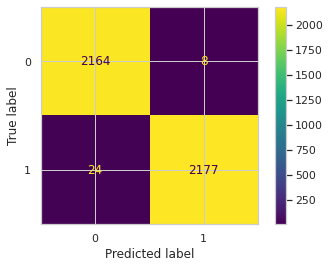

In [ ]:
plot_confusion_matrix(loaded_nb_over_model,X_test_over,y_test_over)
plt.show()

In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_nb_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_nb_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_nb_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_nb_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_nb_over))

Accuracy : 0.992682
Precision : 0.996339
Recall : 0.989096
F1 : 0.992704
kappa_statistic : 0.985365


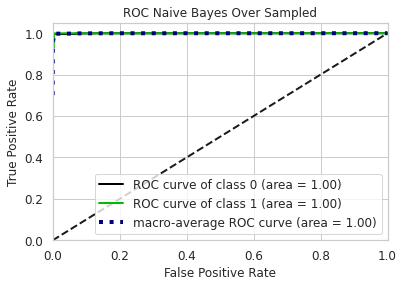

In [ ]:
skplt.metrics.plot_roc(y_test_over, loaded_nb_over_model.predict_proba(X_test_over), plot_micro=False)
plt.title('ROC Naive Bayes Over Sampled')
plt.show()

# Naive Bayes with Selected Features

In [ ]:
#Naive Bayes with selected Features
bnb_sf=BernoulliNB(class_prior=[0.5,0.5], alpha=1 )
bnb_sf.fit(X_train_sf, y_train_sf)

BernoulliNB(alpha=1, class_prior=[0.5, 0.5])

In [ ]:
dump(bnb_sf, 'bnb_sf.joblib')
loaded_nb_model = load('bnb_sf.joblib')

In [ ]:
y_pred_nb_sf = loaded_nb_model.predict(X_test_sf)

In [ ]:
print('Classification Report')
print(classification_report(y_test_sf, y_pred_nb_sf,digits=4))

Classification Report
              precision    recall  f1-score   support

           0     0.9890    0.9963    0.9927      2172
           1     0.9963    0.9891    0.9927      2201

    accuracy                         0.9927      4373
   macro avg     0.9927    0.9927    0.9927      4373
weighted avg     0.9927    0.9927    0.9927      4373



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



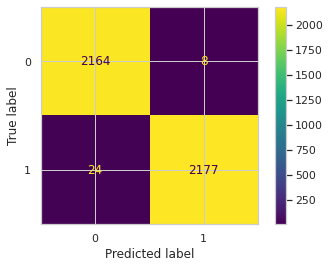

In [ ]:
plot_confusion_matrix(loaded_nb_model,X_test_sf,y_test_sf)


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_sf, y_pred_nb_sf))
print('Precision : %3f' % precision_score(y_test_sf, y_pred_nb_sf))
print('Recall : %3f' % recall_score(y_test_sf, y_pred_nb_sf))
print('F1 : %3f' % f1_score(y_test_sf, y_pred_nb_sf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_sf, y_pred_nb_sf))

Accuracy : 0.992682
Precision : 0.996339
Recall : 0.989096
F1 : 0.992704
kappa_statistic : 0.985365


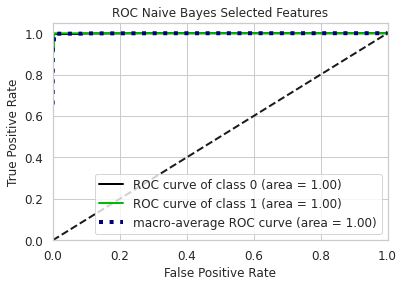

In [ ]:
skplt.metrics.plot_roc(y_test_sf, loaded_nb_model.predict_proba(X_test_sf), plot_micro=False)
plt.title('ROC Naive Bayes Selected Features')
plt.show()

![](https://drive.google.com/uc?export=view&id=1cD2IEugXo2dKp5-yolWzTXFNaZqkQWDN)

 **Decision Tree on Raw Data- Gini Impurity**

In [ ]:
#Decision Tree Model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import joblib

dtmodeldump = DecisionTreeClassifier().fit(X_train,y_train)
joblib.dump(dtmodeldump, 'dtmodeldump.joblib')
dtmodel = joblib.load('dtmodeldump.joblib')
y_pred_dt = dtmodel.predict(X_test)

Save DT model

In [ ]:
dtmodel = joblib.load('dtmodeldump.joblib')
y_pred_dt = dtmodel.predict(X_test)

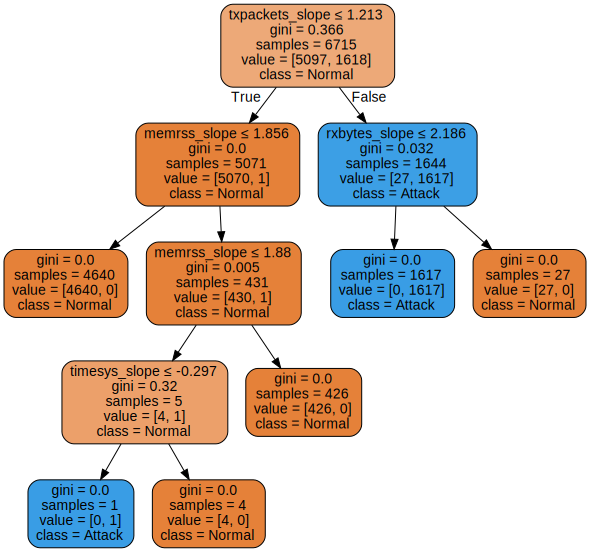

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(dtmodel, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt)
c_report = classification_report(y_pred_dt, y_test,digits=4)
c_matrix = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0     1.0000    0.9986    0.9993      2194
           1     0.9956    1.0000    0.9978       685

    accuracy                         0.9990      2879
   macro avg     0.9978    0.9993    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879

Confusion matrix:
[[2191    0]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



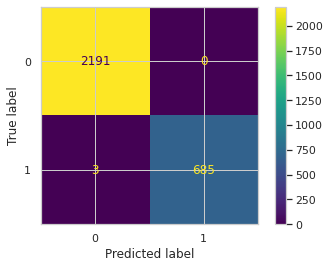

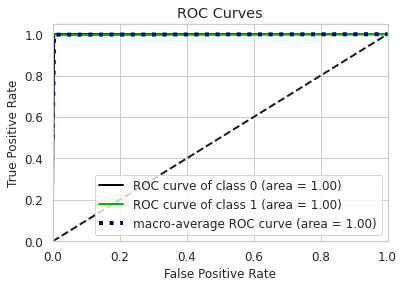

In [ ]:
plot_confusion_matrix(dtmodel,X_test,y_test)
skplt.metrics.plot_roc(y_test, dtmodel.predict_proba(X_test), plot_micro=False)
plt.show()

**Pruning the Decison Tree**

In [ ]:
path = dtmodel.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 9.92606404e-05 7.90962601e-03 3.57581989e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

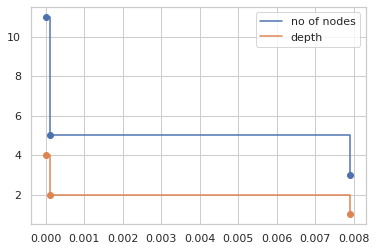

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

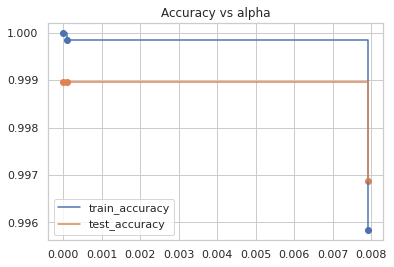

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
clf_dump = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.010)
clf_dump.fit(X_train,y_train)
joblib.dump(clf_dump,'clf_dump.joblib')



['clf_dump.joblib']

Save prunned DT model

In [ ]:
clf_=joblib.load('clf_dump.joblib')
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')

accuracy = accuracy_score(y_test,y_test_pred)
c_report = classification_report(y_test_pred,y_test,digits=4)
c_matrix = confusion_matrix(y_test, y_test_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_test_pred))
importances = clf_.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

Train score 0.9958302308265078
Test score 0.9968739145536645
Classification report:
Accuracy:  0.9968739145536645
              precision    recall  f1-score   support

           0     0.9973    0.9986    0.9979      2188
           1     0.9956    0.9913    0.9935       691

    accuracy                         0.9969      2879
   macro avg     0.9965    0.9950    0.9957      2879
weighted avg     0.9969    0.9969    0.9969      2879

Confusion matrix:
[[2185    6]
 [   3  685]]
kappa_statistic : 0.991418


,feature,importances
0,txpackets_slope,1.0
1,rxbytes_slope,0.0
2,memusable_slope,0.0
3,hdard_req_slope,0.0
4,vdawr_bytes_slope,0.0
5,vdawr_reqs_slope,0.0
6,vdard_bytes_slope,0.0
7,vdard_req_slope,0.0
8,memrss_slope,0.0
9,memlast_update_slope,0.0


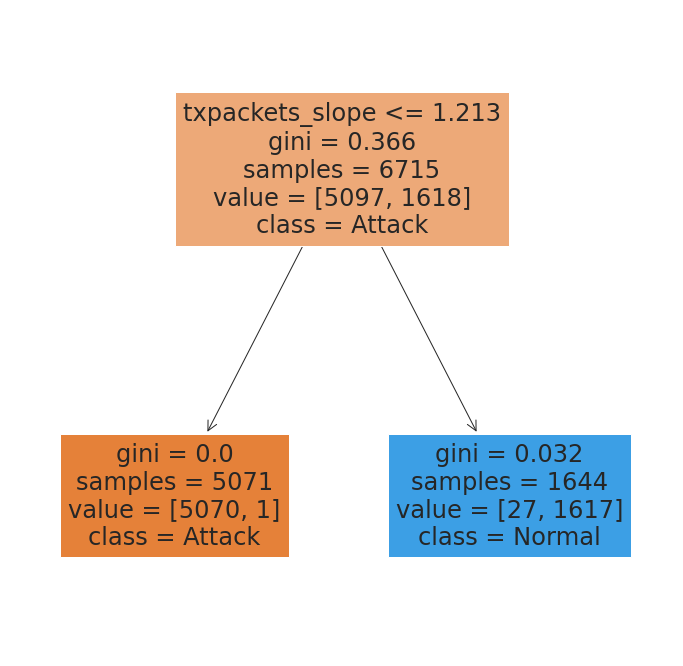

In [ ]:
plt.figure(figsize=(12,12))
features = X_train.columns
classes = ['Attack','Normal']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

**Decion Tree on Raw Data- Entropy & Information Gain**

In [ ]:
#DTree using entropy and information gain
dtmodel_entropydump = DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)
joblib.dump(dtmodel_entropydump,'dtmodel_entropydump.joblib')



['dtmodel_entropydump.joblib']

Save DT model - Entropy and IG

In [ ]:
dtmodel_entropy=joblib.load('dtmodel_entropydump.joblib')
y_pred_dt_entropy = dtmodel_entropy.predict(X_test)
y_pred_dt_entropy = dtmodel_entropy.predict(X_test)

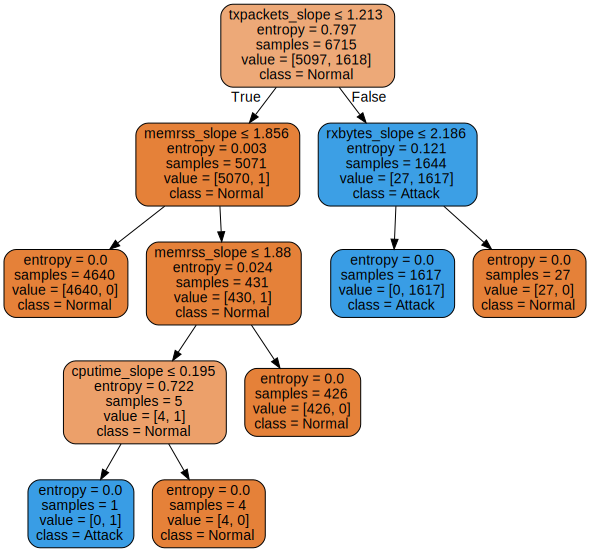

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(dtmodel_entropy, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
accuracy = accuracy_score(y_test,y_pred_dt_entropy)
c_report = classification_report(y_pred_dt_entropy, y_test,digits=4)
c_matrix = confusion_matrix(y_test, y_pred_dt_entropy)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9986106286905175
              precision    recall  f1-score   support

           0     0.9995    0.9986    0.9991      2193
           1     0.9956    0.9985    0.9971       686

    accuracy                         0.9986      2879
   macro avg     0.9976    0.9986    0.9981      2879
weighted avg     0.9986    0.9986    0.9986      2879

Confusion matrix:
[[2190    1]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



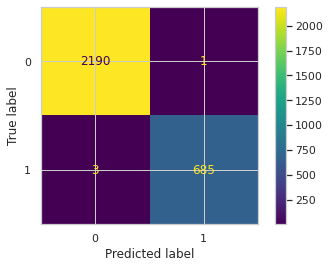

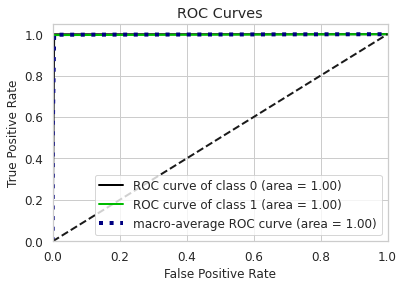

In [ ]:
plot_confusion_matrix(dtmodel_entropy,X_test,y_test)
skplt.metrics.plot_roc(y_test, dtmodel_entropy.predict_proba(X_test), plot_micro=False)
plt.show()

**Grid Search on Decision Tree-Gini Index**

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cvdump = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cvdump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cvdump.best_estimator_
joblib.dump(grid_search_cvdump,'grid_search_cvdump.joblib')

['grid_search_cvdump.joblib']

Save DT model from Grid Search

In [ ]:
grid_search_cv=joblib.load('grid_search_cvdump.joblib')

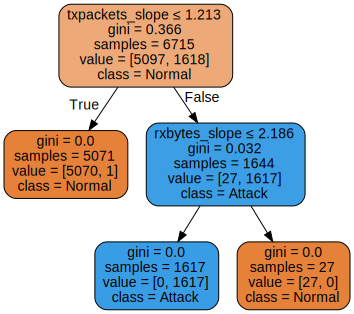

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(grid_search_cv.best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0     1.0000    0.9986    0.9993      2194
           1     0.9956    1.0000    0.9978       685

    accuracy                         0.9990      2879
   macro avg     0.9978    0.9993    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879

Confusion matrix:
[[2191    0]
 [   3  685]]
kappa_statistic : 0.997131


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,feature,importances
0,txpackets_slope,0.978359
1,rxbytes_slope,0.021641
2,memusable_slope,0.000000
3,hdard_req_slope,0.000000
4,vdawr_bytes_slope,0.000000
5,vdawr_reqs_slope,0.000000
6,vdard_bytes_slope,0.000000
7,vdard_req_slope,0.000000
8,memrss_slope,0.000000
9,memlast_update_slope,0.000000


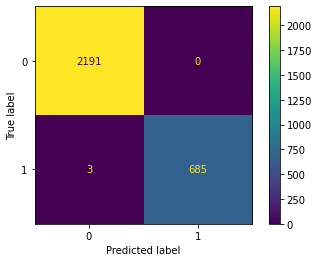

In [ ]:
y_pred_gini = grid_search_cv.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_gini)
c_report = classification_report(y_pred_gini, y_test,digits=4)
c_matrix = confusion_matrix(y_test, y_pred_gini)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv,X_test,y_test)
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_gini))

importances = grid_search_cv.best_estimator_.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_entropydump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

**Grid Search On Decision Tree-Entropy**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_entropydump.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv_entropydump.best_estimator_
joblib.dump(grid_search_cv_entropydump,'grid_search_cv_entropydump.joblib')

['grid_search_cv_entropydump.joblib']

Save DT model - Entropy

In [ ]:
grid_search_cv_entropy=joblib.load('grid_search_cv_entropydump.joblib')

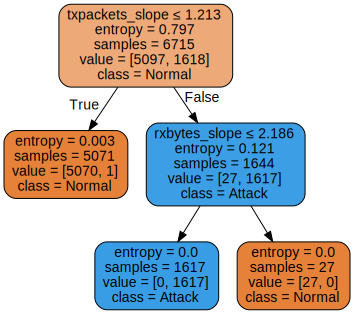

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_entropy.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test") 
dot_data = tree.export_graphviz(grid_search_cv_entropy.best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9989579715178881
              precision    recall  f1-score   support

           0     1.0000    0.9986    0.9993      2194
           1     0.9956    1.0000    0.9978       685

    accuracy                         0.9990      2879
   macro avg     0.9978    0.9993    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879

Confusion matrix:
[[2191    0]
 [   3  685]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



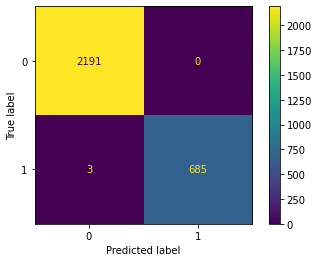

In [ ]:
y_pred_entropy = grid_search_cv_entropy.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_entropy)
c_report = classification_report(y_pred_entropy, y_test,digits=4)
c_matrix = confusion_matrix(y_test, y_pred_entropy)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_entropy,X_test,y_test)

**Decision Tree on Oversampled Data- Gini Impurity**

In [ ]:
#Decision Tree on Oversampled Data

dtmodel_overdump = DecisionTreeClassifier().fit(X_train_over,y_train_over)
joblib.dump(dtmodel_overdump,'dtmodel_overdump.joblib')



['dtmodel_overdump.joblib']

Save DT on Oversampled datamodel

In [ ]:
dtmodel_over=joblib.load('dtmodel_overdump.joblib')
y_pred_over_dt = dtmodel.predict(X_test_over)

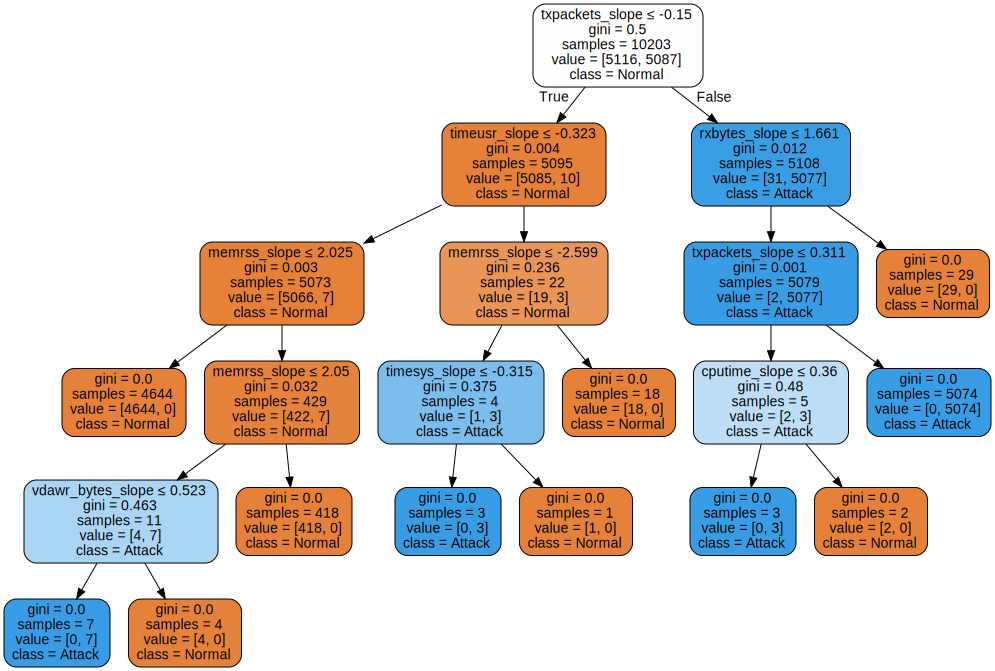

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_over, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(dtmodel_over, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
accuracy = accuracy_score(y_test_over,y_pred_over_dt)
c_report = classification_report(y_pred_over_dt, y_test_over,digits=4)
c_matrix = confusion_matrix(y_test_over, y_pred_over_dt)

In [ ]:
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.4969128744568946
              precision    recall  f1-score   support

           0     1.0000    0.4968    0.6638      4372
           1     0.0005    1.0000    0.0009         1

    accuracy                         0.4969      4373
   macro avg     0.5002    0.7484    0.3324      4373
weighted avg     0.9998    0.4969    0.6637      4373

Confusion matrix:
[[2172    0]
 [2200    1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



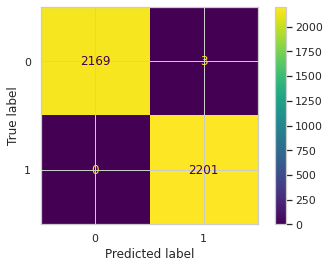

In [ ]:
plot_confusion_matrix(dtmodel_over,X_test_over,y_test_over)


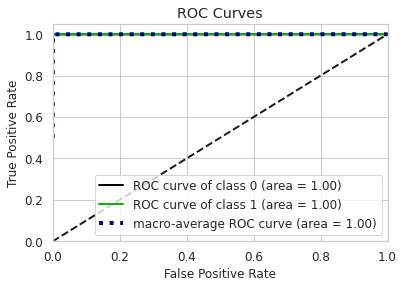

In [ ]:
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

**Pruned Decision Tree**

In [ ]:
path = dtmodel_over.cost_complexity_pruning_path(X_train_over, y_train_over)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 1.47015584e-04 1.95943589e-04 3.60856433e-04
 3.62122112e-04 5.64787833e-03 4.91999835e-01]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_over, y_train_over)
    clfs.append(clf)

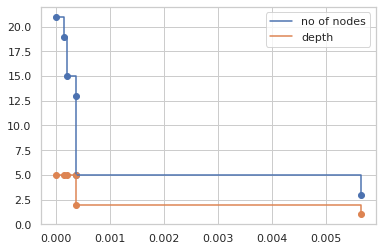

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

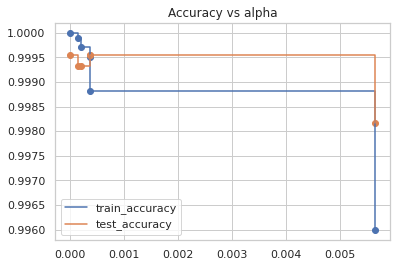

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_over)
    y_test_pred = c.predict(X_test_over)
    train_acc.append(accuracy_score(y_train_pred,y_train_over))
    test_acc.append(accuracy_score(y_test_pred,y_test_over))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
clf_2dump = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.0010)
clf_2dump.fit(X_train_over,y_train_over)
joblib.dump(clf_2dump,'clf_2dump.joblib')


['clf_2dump.joblib']

In [ ]:
clf_=joblib.load('clf_2dump.joblib')
y_train_pred = clf_.predict(X_train_over)
y_test_pred = clf_.predict(X_test_over)

print(f'Train score {accuracy_score(y_train_pred,y_train_over)}')
print(f'Test score {accuracy_score(y_test_pred,y_test_over)}')
accuracy = accuracy_score(y_test_over,y_test_pred)
c_report = classification_report(y_test_pred,y_test_over,digits=4)
c_matrix = confusion_matrix(y_test_over, y_test_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_test_pred))
importances = clf_.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

Train score 0.9988238753307851
Test score 0.9995426480676881
Classification report:
Accuracy:  0.9995426480676881
              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995      2172
           1     0.9995    0.9995    0.9995      2201

    accuracy                         0.9995      4373
   macro avg     0.9995    0.9995    0.9995      4373
weighted avg     0.9995    0.9995    0.9995      4373

Confusion matrix:
[[2171    1]
 [   1 2200]]
kappa_statistic : 0.999085


,feature,importances
0,txpackets_slope,0.988651
1,rxbytes_slope,0.011349
2,memusable_slope,0.000000
3,hdard_req_slope,0.000000
4,vdawr_bytes_slope,0.000000
5,vdawr_reqs_slope,0.000000
6,vdard_bytes_slope,0.000000
7,vdard_req_slope,0.000000
8,memrss_slope,0.000000
9,memlast_update_slope,0.000000


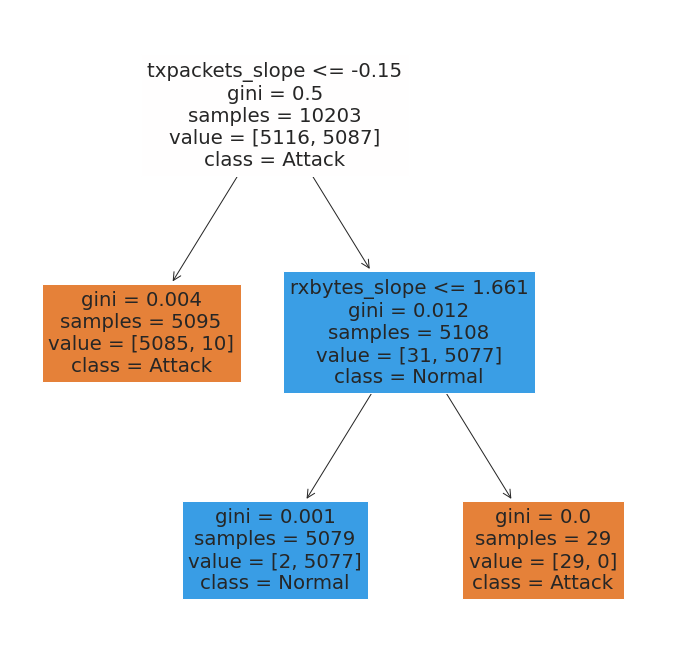

In [ ]:
plt.figure(figsize=(12,12))
features = X_oversampled.columns
classes = ['Attack','Normal']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

**Decision Tree on Oversampled Data- Entropy & Information Gain**

In [ ]:
 dtmodel_over_entropydump = DecisionTreeClassifier(criterion="entropy").fit(X_train_over,y_train_over)
 joblib.dump(dtmodel_over_entropydump,'dtmodel_over_entropydump.joblib')
 

['dtmodel_over_entropydump.joblib']

Save DT on Oversampled datamodel - Entropy and IG

In [ ]:
dtmodel_over_entropy=joblib.load('dtmodel_over_entropydump.joblib')
y_pred_over_dt_entropy = dtmodel.predict(X_test_over)

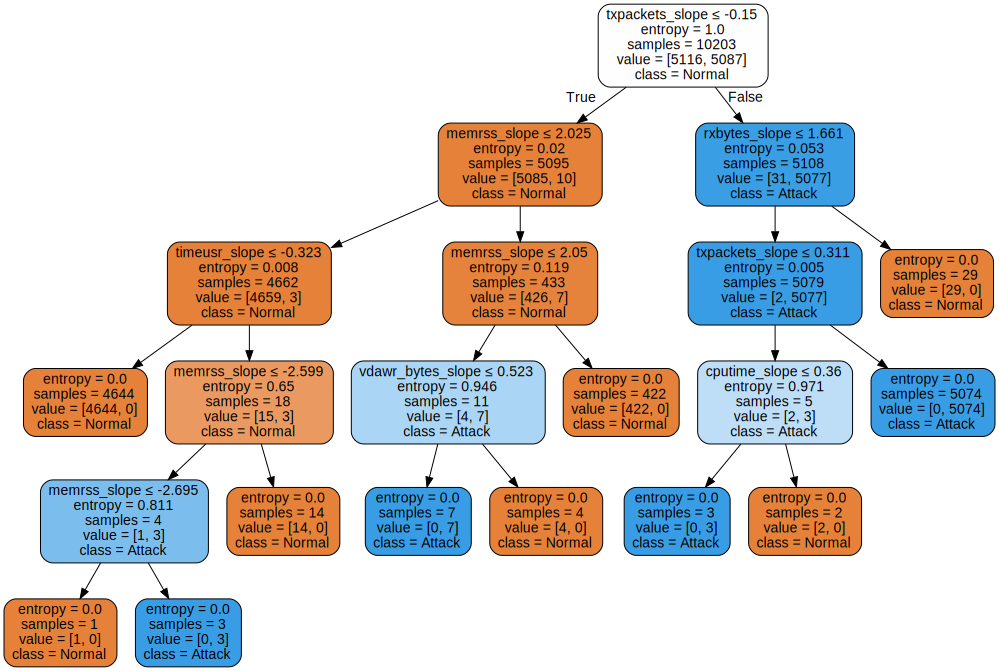

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(dtmodel_over_entropy, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(dtmodel_over_entropy, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.4969128744568946
              precision    recall  f1-score   support

           0     1.0000    0.4968    0.6638      4372
           1     0.0005    1.0000    0.0009         1

    accuracy                         0.4969      4373
   macro avg     0.5002    0.7484    0.3324      4373
weighted avg     0.9998    0.4969    0.6637      4373

Confusion matrix:
[[2172    0]
 [2200    1]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



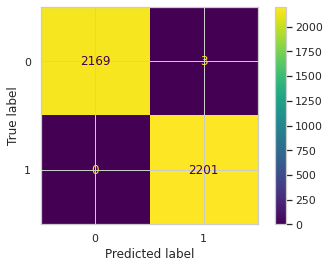

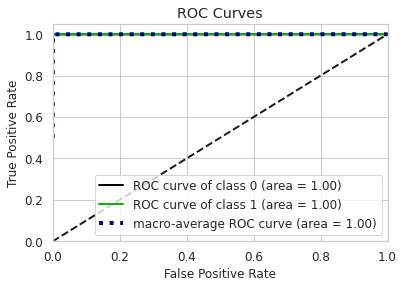

In [ ]:
accuracyen = accuracy_score(y_test_over,y_pred_over_dt_entropy)
c_reporten = classification_report(y_pred_over_dt_entropy, y_test_over,digits=4)
c_matrixen = confusion_matrix(y_test_over, y_pred_over_dt_entropy)
print("Classification report:")
print("Accuracy: ", accuracyen)
print(c_reporten)
print("Confusion matrix:")
print(c_matrixen)
plot_confusion_matrix(dtmodel_over_entropy,X_test_over,y_test_over)
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

**Grid Search on Oversampled Decision Tree-Gini Impurity**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_overdump = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv_overdump.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv_overdump.best_estimator_
joblib.dump(grid_search_cv_overdump.best_estimator_,'grid_search_cv_overdump.best_estimator_.joblib')

['grid_search_cv_overdump.best_estimator_.joblib']

Save DT on Oversampled datamodel - Grid Search and Gini Impurity

In [ ]:
grid_search_cv_over_best_estimator_=joblib.load('grid_search_cv_overdump.best_estimator_.joblib')

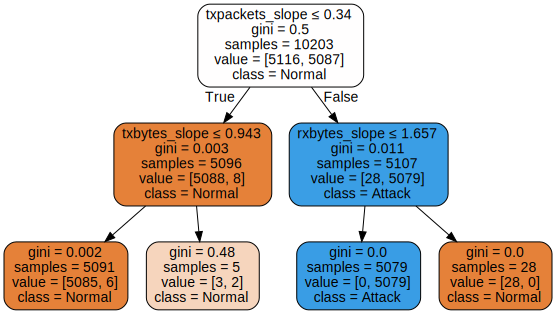

In [ ]:

names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_over_best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(grid_search_cv_over_best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9995426480676881
              precision    recall  f1-score   support

           0     0.9995    0.9995    0.9995      2172
           1     0.9995    0.9995    0.9995      2201

    accuracy                         0.9995      4373
   macro avg     0.9995    0.9995    0.9995      4373
weighted avg     0.9995    0.9995    0.9995      4373

Confusion matrix:
[[2171    1]
 [   1 2200]]
kappa_statistic : 0.999085


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


,feature,importances
0,txpackets_slope,0.988740
1,rxbytes_slope,0.010948
2,txbytes_slope,0.000312
3,memusable_slope,0.000000
4,hdard_req_slope,0.000000
5,vdawr_bytes_slope,0.000000
6,vdawr_reqs_slope,0.000000
7,vdard_bytes_slope,0.000000
8,vdard_req_slope,0.000000
9,memrss_slope,0.000000


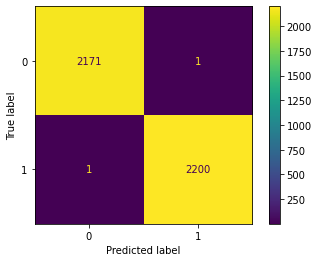

In [ ]:
y_pred_over = grid_search_cv_over_best_estimator_.predict(X_test_over)
accuracy = accuracy_score(y_test_over,y_pred_over)
c_report = classification_report(y_pred_over, y_test_over,digits=4)
c_matrix = confusion_matrix(y_test_over, y_pred_over)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_over_best_estimator_,X_test_over,y_test_over)
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_over))

importances = grid_search_cv_over_best_estimator_.feature_importances_
pd.DataFrame({"feature": X.columns, "importances": importances}).sort_values("importances", ascending=False).reset_index(drop=True)

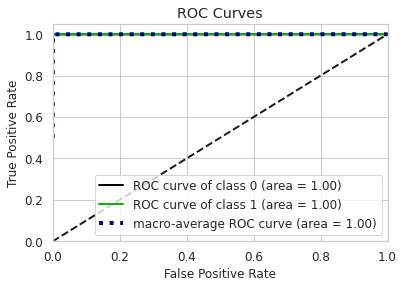

In [ ]:
skplt.metrics.plot_roc(y_test_over, dtmodel_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

**Grid Search On oversampled Decision tree-Entropy**

In [ ]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv_over_entropydump = GridSearchCV(DecisionTreeClassifier(criterion="entropy",random_state=42), params, verbose=1, cv=3)
grid_search_cv_over_entropydump.fit(X_train_over, y_train_over)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv_over_entropydump.best_estimator_
joblib.dump(grid_search_cv_over_entropydump.best_estimator_,'grid_search_cv_over_entropydump.best_estimator_.joblib')

['grid_search_cv_over_entropydump.best_estimator_.joblib']

Save DT on Oversampled datamodel - Grid Search and Entropy

In [ ]:
grid_search_cv_over_entropy_best_estimator_=joblib.load('grid_search_cv_over_entropydump.best_estimator_.joblib')

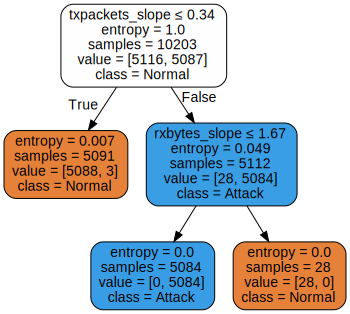

In [ ]:
names=X_train.columns
condn=["Normal","Attack"]
import graphviz 
dot_data = tree.export_graphviz(grid_search_cv_over_entropy_best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("X_test_over") 
dot_data = tree.export_graphviz(grid_search_cv_over_entropy_best_estimator_, out_file=None, 
                   feature_names=names,  
                      class_names=condn,
          filled=True, rounded=True,  
                   special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Classification report:
Accuracy:  0.9993139721015322
              precision    recall  f1-score   support

           0     0.9995    0.9991    0.9993      2173
           1     0.9991    0.9995    0.9993      2200

    accuracy                         0.9993      4373
   macro avg     0.9993    0.9993    0.9993      4373
weighted avg     0.9993    0.9993    0.9993      4373

Confusion matrix:
[[2171    1]
 [   2 2199]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



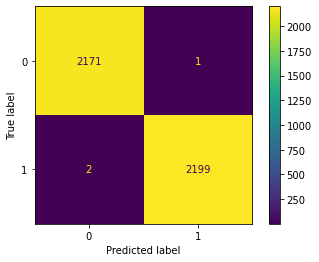

In [ ]:
y_pred_entropyover = grid_search_cv_over_entropy_best_estimator_.predict(X_test_over)
accuracy = accuracy_score(y_test_over,y_pred_entropyover)
c_report = classification_report(y_pred_entropyover, y_test_over,digits=4)
c_matrix = confusion_matrix(y_test_over, y_pred_entropyover)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(grid_search_cv_over_entropy_best_estimator_,X_test_over,y_test_over)

In [ ]:
# Poojitha


## KNN on Raw dataset

In [ ]:
#train test split
X_train5, X_test5,y_train5, y_test5 = train_test_split(X, y, test_size=0.3, random_state =1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_dump = KNeighborsClassifier(n_neighbors=11)
classifier_dump = classifier_dump.fit(X_train5, y_train5)
dump(classifier_dump, 'classifier_dump.joblib')
classifier = load('classifier_dump.joblib')

In [ ]:
y_pred = classifier.predict(X_test5)

Classification report:
Accuracy:  0.9986106286905175
              precision    recall  f1-score   support

           0     0.9986    0.9995    0.9991      2189
           1     0.9985    0.9957    0.9971       690

    accuracy                         0.9986      2879
   macro avg     0.9986    0.9976    0.9981      2879
weighted avg     0.9986    0.9986    0.9986      2879

Confusion matrix:
[[2188    3]
 [   1  687]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



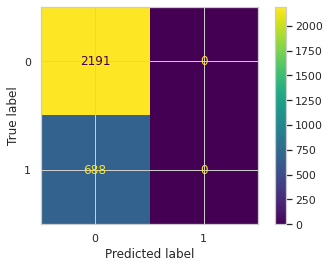

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
c_report = classification_report(y_pred, y_test, digits=4)
c_matrix = confusion_matrix(y_test, y_pred)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
print('kappa_statistic : %3f' % cohen_kappa_score(y_test5, y_pred))

kappa_statistic : 0.996184


In [ ]:
error = []
# Calculating the error rate for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train5, y_train5)
    pred_i = knn.predict(X_test5)
    error.append(np.mean(pred_i != y_test5))

Text(0, 0.5, 'Mean Error')

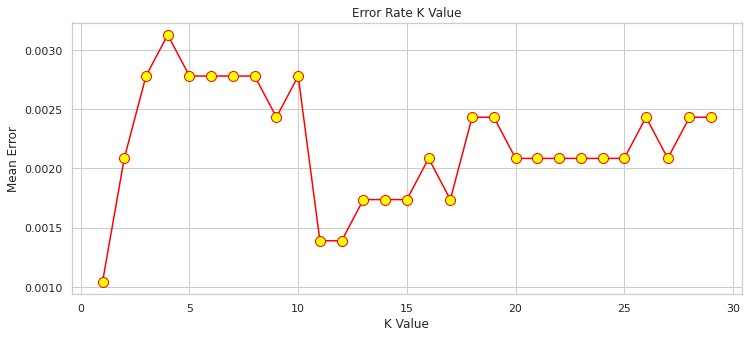

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='red', marker='o',
        markerfacecolor='yellow', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

## With Lasso and Ridge Regression


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

In [ ]:
# Dividing the data into training and testing set
X_train6, X_test6, y_train6, y_test6 = train_test_split(X, y, test_size=0.3, random_state =1)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train6, y_train6)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 9.686583586657608
0.5 : 9.68658358288679
0.75 : 9.686583579102596
1.0 : 9.686583575305043
1.25 : 9.686583571494165
1.5 : 9.686583567669985
1.75 : 9.686583563832524
2.0 : 9.686583559981814


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train6, y_train6)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test6, y_test6))

0.978085838295698


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train6, y_train6)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 9.614815194932367
0.5 : 9.589478915936585
0.75 : 9.55213845333159
1.0 : 9.516552848317552
1.25 : 9.475156542782733
1.5 : 9.427949536727127
1.75 : 9.374931830150738
2.0 : 9.316103423053562


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train6, y_train6)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test6, y_test6))

0.953738506017536


In [ ]:
# Building the two lists for visualization
models = ['Ridge Regression', 'Lasso Regression']
scores = [ridgeModelChosen.score(X_test6, y_test6),
         lassoModelChosen.score(X_test6, y_test6)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test6, y_test6)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test6, y_test6)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Ridge Regression : 0.978085838295698
Lasso Regression : 0.953738506017536


In [ ]:
y_pred_ridge = ridgeModelChosen.predict(X_test6)
accuracy = accuracy_score(y_test6,np.round(abs(y_pred_ridge))) 
c_report = classification_report(np.round(abs(y_pred_ridge)), y_test6, digits=4)
c_matrix = confusion_matrix(y_test6, np.round(abs(y_pred_ridge)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9972212573810351
              precision    recall  f1-score   support

         0.0     0.9973    0.9991    0.9982      2187
         1.0     0.9971    0.9913    0.9942       692

    accuracy                         0.9972      2879
   macro avg     0.9972    0.9952    0.9962      2879
weighted avg     0.9972    0.9972    0.9972      2879

Confusion matrix:
[[2185    6]
 [   2  686]]


In [ ]:
print('kappa_statistic (ridge) : %3f' % cohen_kappa_score(y_test6, np.round(abs(y_pred_ridge))))

kappa_statistic (ridge) : 0.992376


In [ ]:
y_pred_lasso = lassoModelChosen.predict(X_test6)
accuracy = accuracy_score(y_test6,np.round(abs(y_pred_lasso))) 
c_report = classification_report(np.round(abs(y_pred_lasso)), y_test6, digits = 4)
c_matrix = confusion_matrix(y_test6, np.round(abs(y_pred_lasso)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9965265717262939
              precision    recall  f1-score   support

         0.0     0.9963    0.9991    0.9977      2185
         1.0     0.9971    0.9885    0.9928       694

    accuracy                         0.9965      2879
   macro avg     0.9967    0.9938    0.9952      2879
weighted avg     0.9965    0.9965    0.9965      2879

Confusion matrix:
[[2183    8]
 [   2  686]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test6, np.round(abs(y_pred_ridge))))

kappa_statistic (lasso): 0.992376


## KNN + GA


In [ ]:
!pip install --user pygad
#import pygad
import random 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        classifier.fit(X_train.iloc[:,chromosome],y_train)
        predictions = classifier.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print(scores[:2])
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train6,X_test=X_test6,y_train=y_train6,y_test=y_test6)
classifier.fit(X_train6.iloc[:,chromo[-1]],y_train6)

[0.9989579715178881, 0.9989579715178881]
[0.9989579715178881, 0.9989579715178881]
[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452

KNeighborsClassifier(n_neighbors=7)

In [ ]:
predictions = classifier.predict(X_test6.iloc[:,chromo[-1]])

In [ ]:
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test6,predictions)))

Accuracy score after genetic algorithm is= 0.9982632858631469


In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test6, predictions)
c_report = classification_report(predictions, y_test6, digits=4)
c_matrix = confusion_matrix(y_test6, predictions)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9982632858631469
              precision    recall  f1-score   support

           0     1.0000    0.9977    0.9989      2196
           1     0.9927    1.0000    0.9964       683

    accuracy                         0.9983      2879
   macro avg     0.9964    0.9989    0.9976      2879
weighted avg     0.9983    0.9983    0.9983      2879

Confusion matrix:
[[2191    0]
 [   5  683]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test6, predictions))

kappa_statistic (lasso): 0.995213


## KNN on oversampled data

In [ ]:
#train test split
X_train_over5, X_test_over5,y_train_over5, y_test_over5 = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train_over5, y_train_over5)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred_over = classifier.predict(X_test_over5)

Classification report:
Accuracy:  0.9986279442030642
              precision    recall  f1-score   support

           0     0.9986    0.9986    0.9986      2172
           1     0.9986    0.9986    0.9986      2201

    accuracy                         0.9986      4373
   macro avg     0.9986    0.9986    0.9986      4373
weighted avg     0.9986    0.9986    0.9986      4373

Confusion matrix:
[[2169    3]
 [   3 2198]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



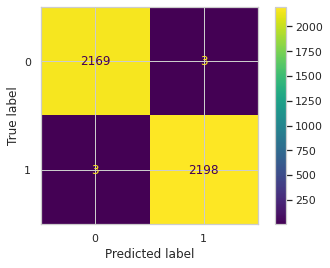

In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test_over5, y_pred_over)
c_report = classification_report(y_test_over5, y_pred_over, digits=4)
c_matrix = confusion_matrix(y_test_over5, y_pred_over)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)
plot_confusion_matrix(classifier,X_test_over5,y_test_over5)

In [ ]:
pip install scikit-plot

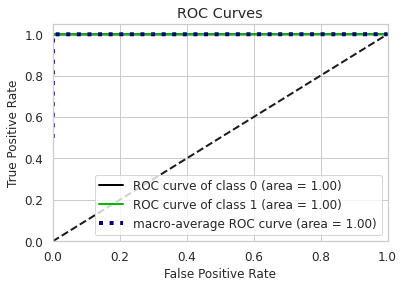

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test_over5, classifier.predict_proba(X_test_over5), plot_micro=False)
plt.show()

In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over5, y_pred_over))

kappa_statistic (lasso): 0.997256


## KNN on over-sampled date with lasso and ridge regression

In [ ]:
# Dividing the data into training and testing set
X_train_over6, X_test_over6,y_train_over6, y_test_over6 = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state =1)

In [ ]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train_over6, y_train_over6)
    scores = cross_val_score(ridgeModel, X_oversampled, y_oversampled, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : -27.105278749665796
0.5 : -27.105275431506453
0.75 : -27.105272116218714
1.0 : -27.10526880379927
1.25 : -27.10526549424489
1.5 : -27.10526218755235
1.75 : -27.105258883718392
2.0 : -27.105255582739712


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train_over6, y_train_over6)
 
# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test_over6,y_test_over6))

0.989156339081979


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train_over6, y_train_over6)
    scores = cross_val_score(lassoModel, X_oversampled, y_oversampled, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : -40.009600666309524
0.5 : -36.50473752952375
0.75 : -34.97184999511001
1.0 : -34.8120033780376
1.25 : -35.683431270583284
1.5 : -37.63032131632812
1.75 : -40.40245455230909
2.0 : -44.06548169002502


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 2, tol = 0.0925)
lassoModelChosen.fit(X_train_over6, y_train_over6)
 
# Evaluating the Lasso Regression model
print(lassoModelChosen.score(X_test_over6,y_test_over6))

0.9751774657893659


In [ ]:
# Building the two lists for visualization
models = ['Ridge Regression', 'Lasso Regression']
scores = [ridgeModelChosen.score(X_test_over6,y_test_over6),
         lassoModelChosen.score(X_test_over6,y_test_over6)]
 
# Building the dictionary to compare the scores
mapping = {}
mapping['Ridge Regression'] = ridgeModelChosen.score(X_test_over6,y_test_over6)
mapping['Lasso Regression'] = lassoModelChosen.score(X_test_over6,y_test_over6)
 
# Printing the scores for different models
for key, val in mapping.items():
    print(str(key)+' : '+str(val))

Ridge Regression : 0.989156339081979
Lasso Regression : 0.9751774657893659


In [ ]:
y_pred_ridge_over = ridgeModelChosen.predict(X_test_over6)
accuracy = accuracy_score(y_test_over6,np.round(abs(y_pred_ridge_over)))
c_report = classification_report(np.round(abs(y_pred_ridge_over)), y_test_over6, digits=4)
c_matrix = confusion_matrix(y_test_over6, np.round(abs(y_pred_ridge_over)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9979419163045964
              precision    recall  f1-score   support

         0.0     0.9963    0.9995    0.9979      2165
         1.0     0.9995    0.9964    0.9980      2208

    accuracy                         0.9979      4373
   macro avg     0.9979    0.9980    0.9979      4373
weighted avg     0.9979    0.9979    0.9979      4373

Confusion matrix:
[[2164    8]
 [   1 2200]]


In [ ]:
print('kappa_statistic (ridge): %3f' % cohen_kappa_score(y_test_over6, np.round(abs(y_pred_ridge_over))))

kappa_statistic (ridge): 0.995884


In [ ]:
y_pred_lasso_over = lassoModelChosen.predict(X_test_over6)
accuracy = accuracy_score(y_test_over6,np.round(abs(y_pred_lasso_over)))
c_report = classification_report(np.round(abs(y_pred_lasso_over)), y_test_over6,digits = 4)
c_matrix = confusion_matrix(y_test_over6, np.round(abs(y_pred_lasso_over)))
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9981705922707523
              precision    recall  f1-score   support

         0.0     0.9968    0.9995    0.9982      2166
         1.0     0.9995    0.9968    0.9982      2207

    accuracy                         0.9982      4373
   macro avg     0.9982    0.9982    0.9982      4373
weighted avg     0.9982    0.9982    0.9982      4373

Confusion matrix:
[[2165    7]
 [   1 2200]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over6, np.round(abs(y_pred_lasso_over))))

kappa_statistic (lasso): 0.996341


![](https://drive.google.com/uc?export=view&id=1AdB4Rtor-x3pZpuh6WGqwAW3MWcJQgrf)

##over sampled - knn + ga

In [ ]:
chromo,score=generations(size=200,n_feat=20,n_parents=100,mutation_rate=0.10,
                     n_gen=38,X_train=X_train_over6,X_test=X_test_over6,y_train=y_train_over6,y_test=y_test_over6)

[0.9993053143452588, 0.9993053143452588]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9993053143452588, 0.9993053143452588]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726294, 0.9996526571726294]
[0.9996526571726

In [ ]:
classifier.fit(X_train6.iloc[:,chromo[-1]],y_train6)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
predictions = classifier.predict(X_test_over6.iloc[:,chromo[-1]])

In [ ]:
print("Accuracy score after genetic algorithm is= "+str(accuracy_score(y_test_over6,predictions)))

Accuracy score after genetic algorithm is= 0.9988566201692202


In [ ]:
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test_over6, predictions)
c_report = classification_report(predictions, y_test_over6, digits=4)
c_matrix = confusion_matrix(y_test_over6, predictions)
print("Classification report:")
print("Accuracy: ", accuracy)
print(c_report)
print("Confusion matrix:")
print(c_matrix)

Classification report:
Accuracy:  0.9988566201692202
              precision    recall  f1-score   support

           0     0.9986    0.9991    0.9988      2171
           1     0.9991    0.9986    0.9989      2202

    accuracy                         0.9989      4373
   macro avg     0.9989    0.9989    0.9989      4373
weighted avg     0.9989    0.9989    0.9989      4373

Confusion matrix:
[[2169    3]
 [   2 2199]]


In [ ]:
print('kappa_statistic (lasso): %3f' % cohen_kappa_score(y_test_over6, predictions))

kappa_statistic (lasso): 0.997713


![](https://drive.google.com/uc?export=view&id=1zTnQMr3zWlidMlujohcIdb-5O9nOBCLP)

In [ ]:
#Yasaman

# Logistic Regression on Imbalanced data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
preds_LR = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
print('Classification Report - Logistic Regression on Imblanced Data')
print(classification_report(y_test, preds_LR, digits=4))

Classification Report - Logistic Regression on Imblanced Data
              precision    recall  f1-score   support

           0     0.9991    0.9986    0.9989      2191
           1     0.9956    0.9971    0.9964       688

    accuracy                         0.9983      2879
   macro avg     0.9974    0.9979    0.9976      2879
weighted avg     0.9983    0.9983    0.9983      2879



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



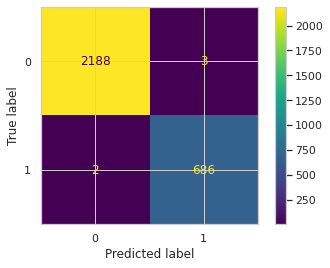

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

Logistic Regression - Grid Search on Imbalanced data

In [ ]:
param_grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"],
    "solver":['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
    }# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9985103523525656


# Creating Logistic Regression with hyper params found via Grid Search

In [ ]:
clf_dump = LogisticRegression(C=1000.0, penalty='l2', solver='newton-cg').fit(X_train, y_train)


In [ ]:
dump(clf_dump, 'clf_dump.joblib')
clf = load('clf_dump.joblib')

In [ ]:
preds_LR = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, cohen_kappa_score
print('Classification Report - Logistic Regression on Imbalanced Data - best params')
print(classification_report(y_test, preds_LR, digits=4))
print('Cohen Kappa Score - Logistic Regression on Imbalanced Data - best params')
print(cohen_kappa_score(y_test, preds_LR))

Classification Report - Logistic Regression on Imbalanced Data - best params
              precision    recall  f1-score   support

           0     0.9982    0.9986    0.9984      2191
           1     0.9956    0.9942    0.9949       688

    accuracy                         0.9976      2879
   macro avg     0.9969    0.9964    0.9967      2879
weighted avg     0.9976    0.9976    0.9976      2879

Cohen Kappa Score - Logistic Regression on Imbalanced Data - best params
0.9933120123930039


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



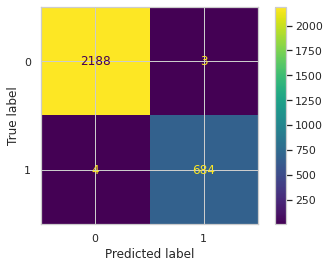

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=10)

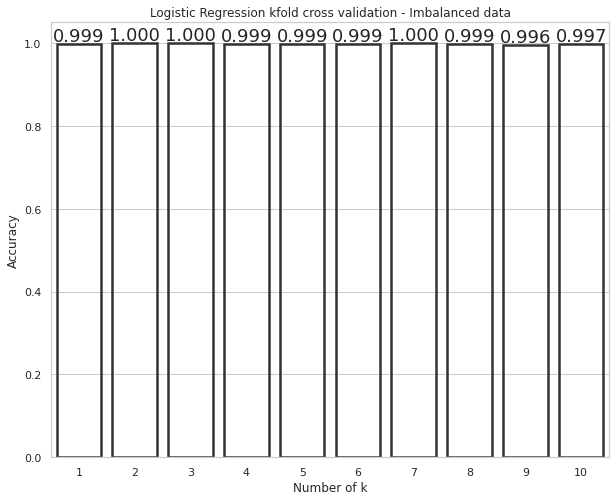

In [ ]:
import seaborn as sns
# Defining the plot size
def plt_kfold(scores,name):
	plt.figure(figsize=(10, 8))
	plt.rcParams['font.size'] = '18'
	# Defining the values for x-axis, y-axis
	# and from which dataframe the values are to be picked
	folds = [i for i in range(1,11)]
	plots = sns.barplot(x=folds, y=scores, linewidth=2.5, facecolor=(1, 1, 1, 0),
									errcolor=".2", edgecolor=".2")

	# Iterrating over the bars one-by-one
	for bar in plots.patches:

	# Using Matplotlib's annotate function and
	# passing the coordinates where the annotation shall be done
	# x-coordinate: bar.get_x() + bar.get_width() / 2
	# y-coordinate: bar.get_height()
	# free space to be left to make graph pleasing: (0, 8)
	# ha and va stand for the horizontal and vertical alignment
		plots.annotate(format(bar.get_height(), '.3f'),
					(bar.get_x() + bar.get_width() / 2,
						bar.get_height()), ha='center', va='center',
					xytext=(0, 8),
					textcoords='offset points'
										)

	# Setting the label for x-axis
	plt.xlabel("Number of k")

	# Setting the label for y-axis
	plt.ylabel("Accuracy")

	# Setting the title for the graph
	plt.title(name)

	# Finally showing the plot
	plt.show()
ttl = "Logistic Regression kfold cross validation - Imbalanced data"
plt_kfold(scores, ttl)

# Logistic Regression on oversampled data

Classification Report - Logistic Regression on Balanced Data
              precision    recall  f1-score   support

           0     0.9995    0.9986    0.9991      2172
           1     0.9986    0.9995    0.9991      2201

    accuracy                         0.9991      4373
   macro avg     0.9991    0.9991    0.9991      4373
weighted avg     0.9991    0.9991    0.9991      4373



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



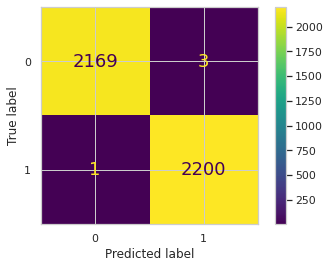

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_over, y_train_over)
preds_LR = clf.predict(X_test_over)
print('Classification Report - Logistic Regression on Balanced Data')
print(classification_report(y_test_over, preds_LR, digits=4))
plot_confusion_matrix(clf,X_test_over,y_test_over)
plt.show()

Grid Search on Oversampled data

In [ ]:

logreg_cv.fit(X_train_over,y_train_over)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.997059495688579


In [ ]:
logreg_over_best_params_dump = LogisticRegression(C=10.0, penalty='l1', solver='liblinear').fit(X_train_over, y_train_over)


#saving the best model on Oversmpled data

In [ ]:
dump(logreg_over_best_params_dump, 'logreg_over_best_params_dump.joblib')
logreg_over_best_params = load('logreg_over_best_params_dump.joblib')

In [ ]:
preds_LR_over_best = logreg_over_best_params.predict(X_test_over)

In [ ]:
from sklearn.metrics import precision_score, cohen_kappa_score
print('Classification Report - Logistic Regression on Balanced Data best hyperparams')
print(classification_report(y_test_over, preds_LR_over_best, digits=4))
print('Cohen Kappa Score - Logistic Regression on Balanced Data best hyperparams')
print(cohen_kappa_score(y_test_over, preds_LR_over_best))

Classification Report - Logistic Regression on Balanced Data best hyperparams
              precision    recall  f1-score   support

           0     0.9995    0.9991    0.9993      2172
           1     0.9991    0.9995    0.9993      2201

    accuracy                         0.9993      4373
   macro avg     0.9993    0.9993    0.9993      4373
weighted avg     0.9993    0.9993    0.9993      4373

Cohen Kappa Score - Logistic Regression on Balanced Data best hyperparams
0.9986278796981315


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


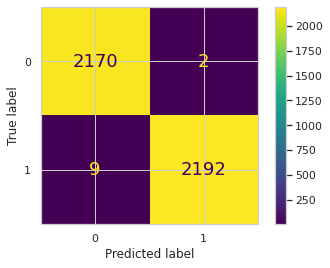

In [ ]:
plot_confusion_matrix(logreg_over_best_params,X_test_over,y_test_over)

![](https://drive.google.com/uc?export=view&id=1-_XuJoG4MdUD3w0bAoTZZJPzaY6n5jk1)

In [ ]:
test = logreg_over_best_params.coef_.reshape(-1,1)

In [ ]:
flat_list = [item for sublist in test for item in sublist]

In [ ]:
flat_list = np.around(np.absolute(flat_list), decimals=2)

In [ ]:
# using dictionary comprehension
# to convert lists to dictionary
res = {flat_list[i]: X_train.columns[i] for i in range(len(flat_list))}

In [ ]:
ress = dict(sorted(res.items(), key=lambda item: item[1]))

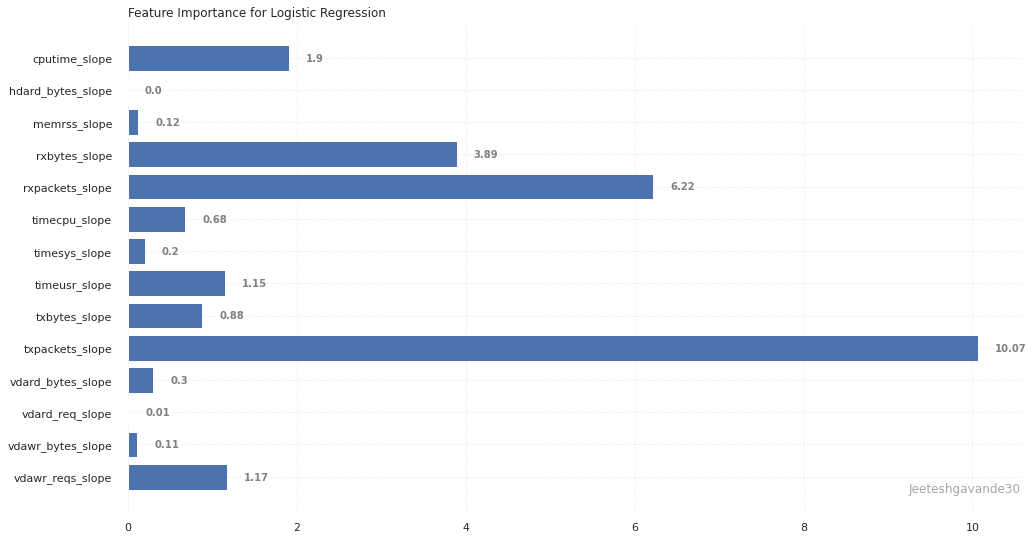

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(list(ress.values()), list(ress.keys()))

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Feature Importance for Logistic Regression',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()


In [ ]:
scores = cross_val_score(logreg_over_best_params, X_train_over, y_train_over, cv=10)

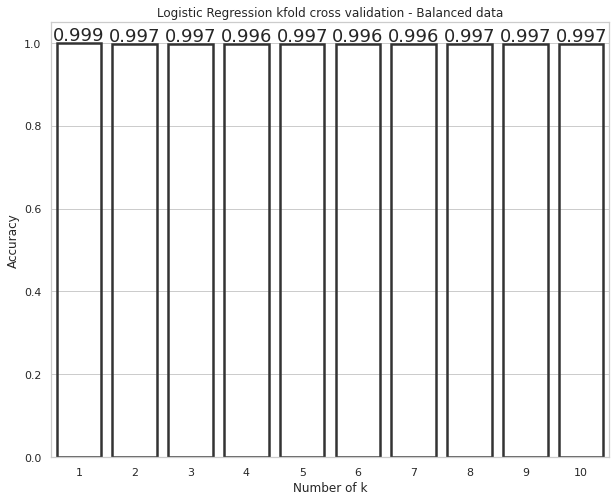

In [ ]:
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(10, 8))
plt.rcParams['font.size'] = '18'
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
folds = [i for i in range(1,11)]
plots = sns.barplot(x=folds, y=scores, linewidth=2.5, facecolor=(1, 1, 1, 0),
                 errcolor=".2", edgecolor=".2")

# Iterrating over the bars one-by-one
for bar in plots.patches:

# Using Matplotlib's annotate function and
# passing the coordinates where the annotation shall be done
# x-coordinate: bar.get_x() + bar.get_width() / 2
# y-coordinate: bar.get_height()
# free space to be left to make graph pleasing: (0, 8)
# ha and va stand for the horizontal and vertical alignment
	plots.annotate(format(bar.get_height(), '.3f'),
				(bar.get_x() + bar.get_width() / 2,
					bar.get_height()), ha='center', va='center',
				 xytext=(0, 8),
				textcoords='offset points'
                  )

# Setting the label for x-axis
plt.xlabel("Number of k")

# Setting the label for y-axis
plt.ylabel("Accuracy")

# Setting the title for the graph
plt.title("Logistic Regression kfold cross validation - Balanced data")

# Finally showing the plot
plt.show()


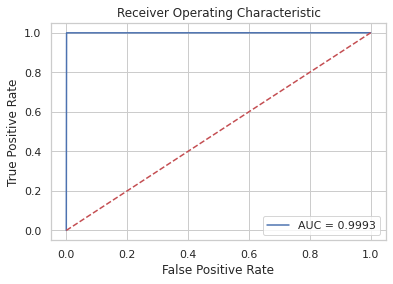

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test_over, preds_LR_over_best)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gcf().savefig('roc.png')

# Xgboost on Imbalance data

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


xgb_cl = xgb.XGBClassifier()

# Init classifier

# Fit
xgb_cl = xgb_cl.fit(X_train, y_train)


Saving the Xgboost Imbalanced data model

In [ ]:
dump(xgb_cl_dump, 'xgb_cl_dump.joblib')
xgb_cl = load('xgb_cl_dump.joblib')

In [ ]:

# Predict
xgb_preds = xgb_cl.predict(X_test)

## XGBoost Feature Importance

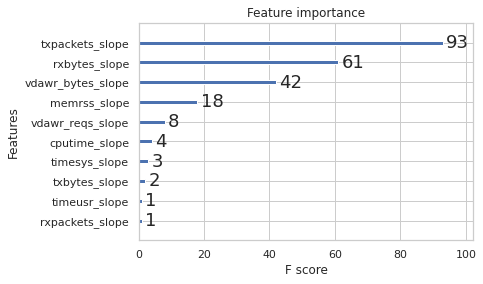

<Figure size 720x360 with 0 Axes>

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_cl)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb_preds)

array([[2191,    0],
       [   3,  685]])

# Confusion Matrix XGBoost - Unbalanced Data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



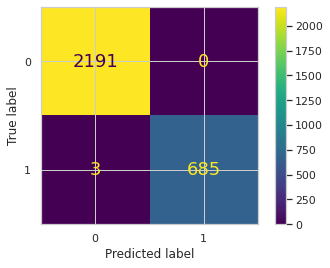

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_cl,X_test,y_test)
plt.show()

In [ ]:
print('Classification Report - XGBoost on Imbalanced Data')
print(classification_report(y_test, xgb_preds, digits=4))
print('Cohen Kappa Score - XGBoost on Imbalanced Data ')
print(cohen_kappa_score(y_test, xgb_preds))

Classification Report - XGBoost on Imbalanced Data
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      2191
           1     1.0000    0.9956    0.9978       688

    accuracy                         0.9990      2879
   macro avg     0.9993    0.9978    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879

Cohen Kappa Score - XGBoost on Imbalanced Data 
0.9971308574175325


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
xgb_cl_best_params = xgb.XGBClassifier(colsample_bytree = 0.5,
 gamma = 1,
 learning_rate = 0.01,
 max_depth = 7,
 reg_lambda = 0,
 scale_pos_weight = 1,
 subsample = 0.8)

# Init classifier

# Fit
xgb_cl = xgb_cl_best_params.fit(X_train, y_train)

# Predict
xgb_preds_best_params = xgb_cl.predict(X_test)

## XGBoost Feature Importance - Best Parameters

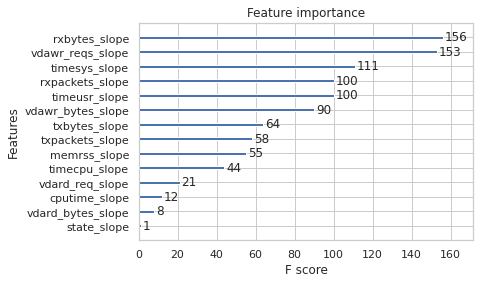

<Figure size 864x576 with 0 Axes>

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_cl)
plt.figure(figsize=(12,8))
plt.show()

In [ ]:
print('Classification Report - XGBoost on Imbalanced Data - best params ')
print(classification_report(y_test, xgb_preds, digits=4))
print('Cohen Kappa Score - XGBoost on Imbalanced Data - best params ')
print(cohen_kappa_score(y_test, xgb_preds))

Classification Report - XGBoost on Imbalanced Data - best params 
              precision    recall  f1-score   support

           0     0.9986    1.0000    0.9993      2191
           1     1.0000    0.9956    0.9978       688

    accuracy                         0.9990      2879
   macro avg     0.9993    0.9978    0.9986      2879
weighted avg     0.9990    0.9990    0.9990      2879

Cohen Kappa Score - XGBoost on Imbalanced Data - best params 
0.9971308574175325


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


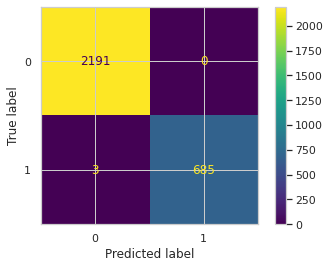

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(xgb_cl,X_test,y_test)
plt.show()

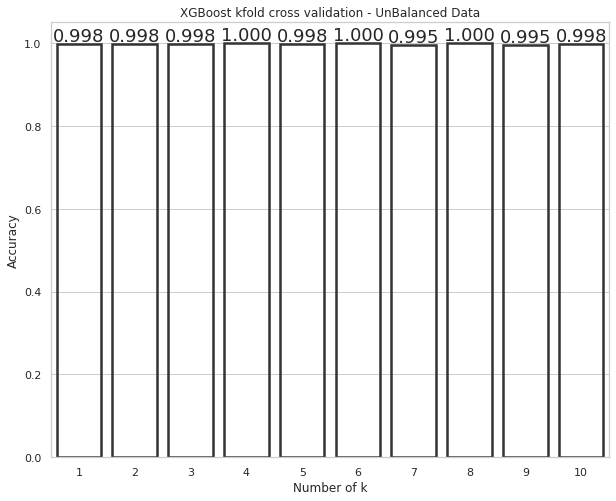

In [ ]:
scores = cross_val_score(xgb_cl,X_test_over,y_test_over, cv=10)
plt_kfold(scores, "XGBoost kfold cross validation - UnBalanced Data")

#Xgboost on oversampled data


In [ ]:
xgb_cl_over = xgb.XGBClassifier()

# Fit
xgb_cl_over = xgb_cl_over.fit(X_train_over, y_train_over)

# Predict
xgb_preds_over = xgb_cl_over.predict(X_test_over)

## XGBoost Feature Importance on Balanced Data

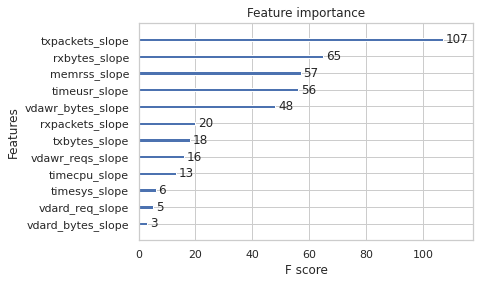

<Figure size 720x360 with 0 Axes>

In [ ]:
plot_importance(xgb_cl_over)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
print('Classification Report - XGBoost on balanced Data ')
print(classification_report(y_test_over, xgb_preds_over, digits=4))
print('Cohen Kappa Score - XGBoost on balanced Data ')
print(cohen_kappa_score(y_test_over, xgb_preds_over))

Classification Report - XGBoost on balanced Data 
              precision    recall  f1-score   support

           0     0.9986    0.9995    0.9991      2172
           1     0.9995    0.9986    0.9991      2201

    accuracy                         0.9991      4373
   macro avg     0.9991    0.9991    0.9991      4373
weighted avg     0.9991    0.9991    0.9991      4373

Cohen Kappa Score - XGBoost on balanced Data 
0.9981705229112406


In [ ]:
confusion_matrix(y_test_over, xgb_preds_over)

array([[2171,    1],
       [   2, 2199]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


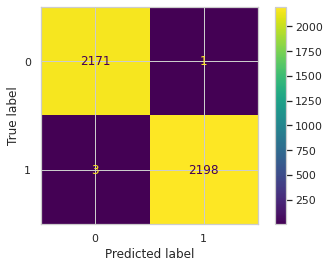

In [ ]:
plot_confusion_matrix(xgb_cl_over,X_test_over,y_test_over)
plt.show()

In [ ]:
# Fit Grid Search for oversampled data
_ = grid_cv.fit(X_train_over, y_train_over)

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

![](https://drive.google.com/uc?export=view&id=1me1KYdn4GvZNHqeWwOqGWGMutLL_yQrh)

In [ ]:
xgb_cl_over_best_params = xgb.XGBClassifier(
    colsample_bytree=0.5, 
    gamma=0, 
    learning_rate=0.1, 
    max_depth=7,
    reg_lambda=0,
    scale_pos_weight=3,
    subsample=0.8)

# Fit
xgb_cl_over_best_params_dump = xgb_cl_over_best_params.fit(X_train_over, y_train_over)



Save XGBoost best params based on Grid Search model

In [ ]:
dump(xgb_cl_over_best_params_dump, 'xgb_cl_over_best_params_dump.joblib')
xgb_cl_over_best_params = load('xgb_cl_over_best_params_dump.joblib')

In [ ]:
# Predict
xgb_preds_over_best = xgb_cl_over_best_params.predict(X_test_over)

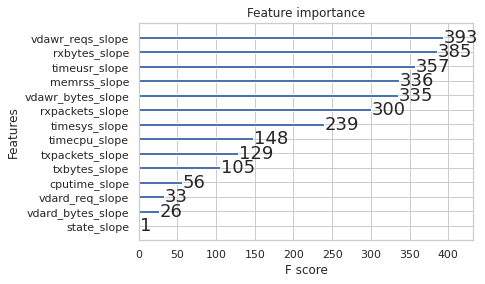

<Figure size 720x360 with 0 Axes>

In [ ]:
plot_importance(xgb_cl_over_best_params)
plt.figure(figsize=(10,5))
plt.show()

In [ ]:
print('Classification Report - XGBoost on balanced Data - best params ')
print(classification_report(y_test_over, xgb_preds_over_best, digits=4))
print('Cohen Kappa Score - XGBoost on balanced Data - best params ')
print(cohen_kappa_score(y_test_over, xgb_preds_over_best))

Classification Report - XGBoost on balanced Data - best params 
              precision    recall  f1-score   support

           0     1.0000    0.9995    0.9998      2172
           1     0.9995    1.0000    0.9998      2201

    accuracy                         0.9998      4373
   macro avg     0.9998    0.9998    0.9998      4373
weighted avg     0.9998    0.9998    0.9998      4373

Cohen Kappa Score - XGBoost on balanced Data - best params 
0.9995426265660439


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



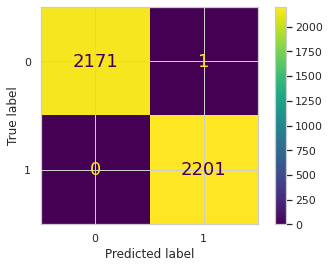

In [ ]:
plot_confusion_matrix(xgb_cl_over_best_params,X_test_over,y_test_over)
plt.show()

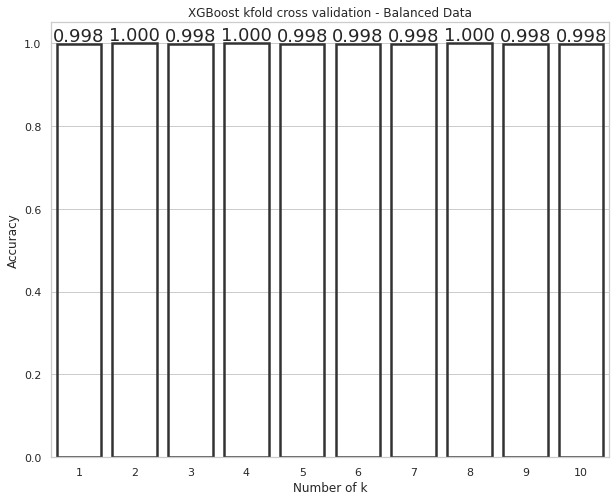

In [ ]:
scores = cross_val_score(xgb_cl_over_best_params,X_test_over,y_test_over, cv=10)
plt_kfold(scores, "XGBoost kfold cross validation - Balanced Data")

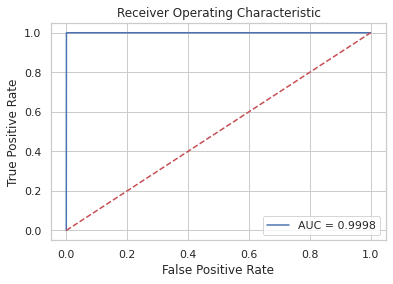

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test_over, xgb_preds_over_best)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.gcf().savefig('roc.png')

## Random Forest on In-Balanced Dataset

RandomForestClassifier()
RF's Accuracy on raw dataset is:  99.93053143452588
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2191
           1       1.00      1.00      1.00       688

    accuracy                           1.00      2879
   macro avg       1.00      1.00      1.00      2879
weighted avg       1.00      1.00      1.00      2879

Accuracy : 0.999305
Precision : 1.000000
Recall : 0.997093
F1 : 0.998544
kappa_statistic : 0.998088


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



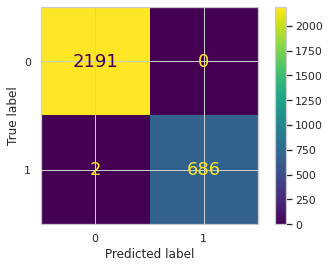

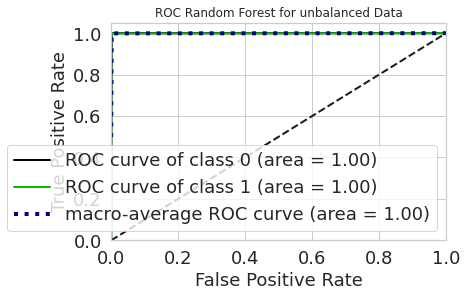

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer,mean_squared_error

scaler = StandardScaler()
X_train1, X_test1,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =1)
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)



rf_model = RandomForestClassifier().fit(X_train,y_train)
print(rf_model)

#save model
dump(rf_model, 'rf_model.joblib')
loaded_rf_model= load('rf_model.joblib')

##testing the model
y_pred_rf = loaded_rf_model.predict(X_test)
y_pred_rf


x = metrics.accuracy_score(y_test, y_pred_rf)
print("RF's Accuracy on raw dataset is: ", x*100)
print(classification_report(y_test, y_pred_rf))

# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, y_pred_rf))
print('Precision : %3f' % precision_score(y_test, y_pred_rf))
print('Recall : %3f' % recall_score(y_test, y_pred_rf))
print('F1 : %3f' % f1_score(y_test, y_pred_rf))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, y_pred_rf))

##confusion matrix
plot_confusion_matrix(rf_model,X_test,y_test)
plt.show()

## ROC curve

## ROC curve
skplt.metrics.plot_roc(y_test, rf_model.predict_proba(X_test), plot_micro=False)
plt.title('ROC Random Forest for unbalanced Data')
plt.show()


### Grid Search On In-Balanced data

In [ ]:
rfc=RandomForestClassifier(random_state=1)
param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rf_model_grid=RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 100, max_depth=5, criterion='gini')

rf_model_grid.fit(X_train, y_train)

dump(rf_model_grid, 'rf_model_grid.joblib')
loaded_rf_model_grid= load('rf_model_grid.joblib')


pred_rf_grid=loaded_rf_model_grid.predict(X_test)
print("Accuracy for Random Forest with grid_search : ",accuracy_score(y_test, pred_rf_grid))

Accuracy for Random Forest with grid_search :  0.9993053143452588


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test, pred_rf_grid))
print('Precision : %3f' % precision_score(y_test, pred_rf_grid))
print('Recall : %3f' % recall_score(y_test, pred_rf_grid))
print('F1 : %3f' % f1_score(y_test, pred_rf_grid))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test, pred_rf_grid))

Accuracy : 0.999305
Precision : 1.000000
Recall : 0.997093
F1 : 0.998544
kappa_statistic : 0.998088


### Random Forest on OverSampled Data

RandomForestClassifier()
RF's Accuracy is on oversampled data :  100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2172
           1       1.00      1.00      1.00      2201

    accuracy                           1.00      4373
   macro avg       1.00      1.00      1.00      4373
weighted avg       1.00      1.00      1.00      4373

Accuracy : 1.000000
Precision : 1.000000
Recall : 1.000000
F1 : 1.000000
kappa_statistic : 1.000000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



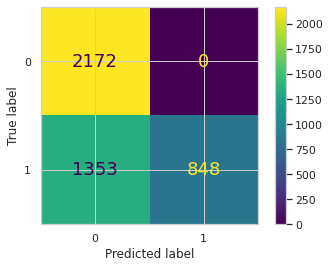

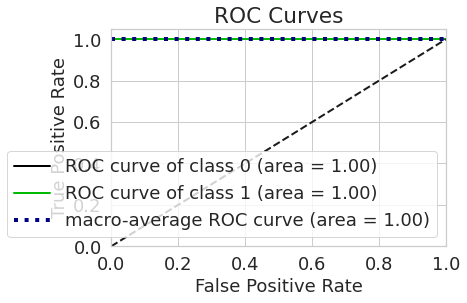

In [ ]:
## training the model
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


rf_model_over = RandomForestClassifier().fit(X_train_over,y_train_over)
print(rf_model_over)

dump(rf_model_over, 'rf_model_over.joblib')
loaded_rf_model_over= load('rf_model_over.joblib')

##testing the model

y_pred_rf_over = loaded_rf_model_over.predict(X_test_over)
y_pred_rf_over

x = metrics.accuracy_score(y_test_over , y_pred_rf_over)
print("RF's Accuracy is on oversampled data : ", x*100)
print(classification_report(y_test_over , y_pred_rf_over))


# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, y_pred_rf_over))
print('Precision : %3f' % precision_score(y_test_over, y_pred_rf_over))
print('Recall : %3f' % recall_score(y_test_over, y_pred_rf_over))
print('F1 : %3f' % f1_score(y_test_over, y_pred_rf_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, y_pred_rf_over))


##confusion matrix
plot_confusion_matrix(rf_model,X_test_over,y_test_over)
plt.show()

## ROC curve
skplt.metrics.plot_roc(y_test_over, rf_model_over.predict_proba(X_test_over), plot_micro=False)
plt.show()

### Grid Search on OverSampling Data

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [1, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_over,y_train_over)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 100]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
rf_model_grid_over=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 100, max_depth=8, criterion='gini')

rf_model_grid_over.fit(X_train_over,y_train_over)

#save model
dump(rf_model_grid_over, 'rf_model_grid_over.joblib')
loaded_rf_model_grid_over= load('rf_model_grid_over.joblib')

pred_rf_grid_over=loaded_rf_model_grid_over.predict(X_test_over)
print("Accuracy for Random Forest with grid_search : ",accuracy_score(y_test_over, pred_rf_grid_over))

Accuracy for Random Forest with grid_search :  1.0


In [ ]:
# Evaluation metrics
print('Accuracy : %3f' % accuracy_score(y_test_over, pred_rf_grid_over))
print('Precision : %3f' % precision_score(y_test_over, pred_rf_grid_over))
print('Recall : %3f' % recall_score(y_test_over, pred_rf_grid_over))
print('F1 : %3f' % f1_score(y_test_over, pred_rf_grid_over))
print('kappa_statistic : %3f' % cohen_kappa_score(y_test_over, pred_rf_grid_over))

Accuracy : 1.000000
Precision : 1.000000
Recall : 1.000000
F1 : 1.000000
kappa_statistic : 1.000000


![](https://drive.google.com/uc?export=view&id=1BXRXEbsIJqIt7tKNP39w_pzLIz7KwKFK)

## Model Comparison

In [ ]:
from pandas.core.common import random_state
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve

classifiers = [RandomForestClassifier(random_state=1), 
               SVC(probability=True),
               DecisionTreeClassifier(random_state=1),
               BernoulliNB(alpha =1 ),
               KNeighborsClassifier(),
               LogisticRegression(random_state=1),
               xgb.XGBClassifier(random_state=1)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_over, y_train_over)
    yproba = model.predict_proba(X_test_over)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_over,  yproba)
    auc = roc_auc_score(y_test_over, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

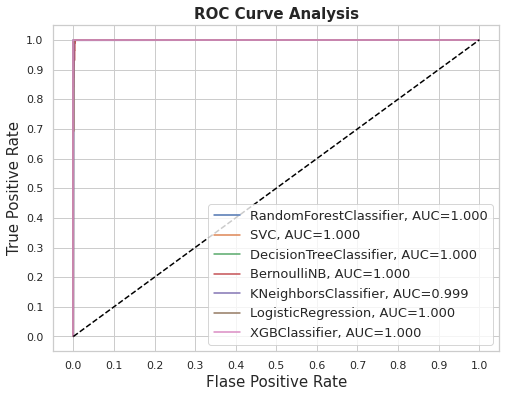

In [ ]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()